# **IE 643: Feed Forward Neural Network Demo**

In this demo, we will see how to build a Multi-layered perceptron (Feed Forward Neural Network or FFNN) from scratch.

# Importing the basic libaries -

In [210]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(500)

# **Loading the Data-**

We will be using MNIST Dataset for the classification problem. MNIST dataset contains grayscale images of handwritten digits of the size 28*28. We will be building a neural network to classify these images.

The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Source- http://yann.lecun.com/exdb/mnist/

In [211]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(f'Train: X - {X_train.shape}, y - {Y_train.shape}')
print(f'Test: X - {X_test.shape}, y - {Y_test.shape}')

Train: X - (60000, 28, 28), y - (60000,)
Test: X - (10000, 28, 28), y - (10000,)


#### Displaying an image from the dataset

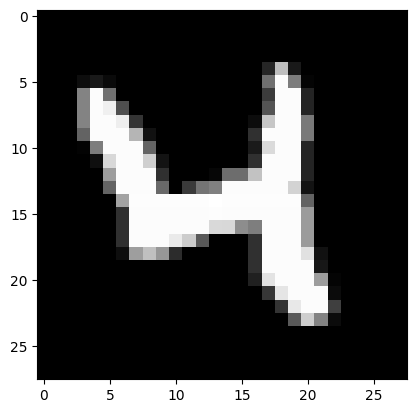



Label in dataset: 4


In [212]:
plt.imshow(X_train[20],cmap='gray')
plt.show()
print(f"\n\nLabel in dataset: {Y_train[20]}")

In [213]:
digits = np.unique(Y_train)
print(digits)

[0 1 2 3 4 5 6 7 8 9]


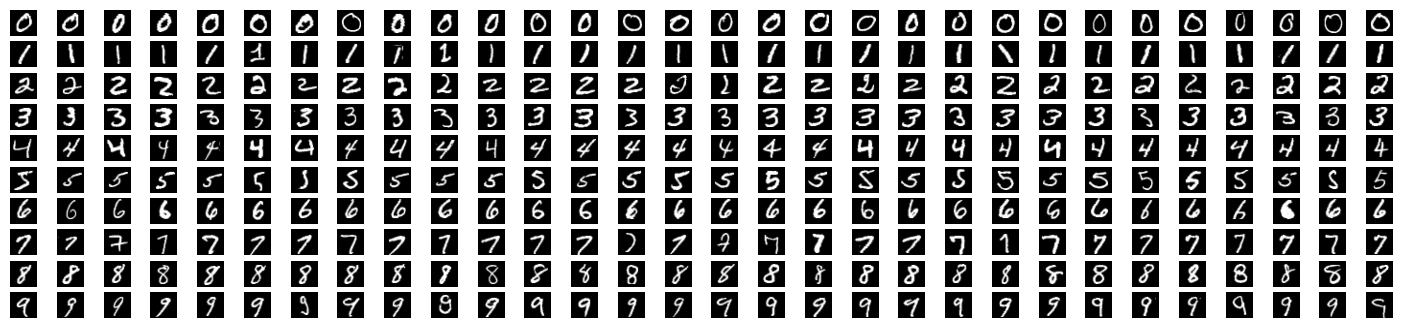

In [214]:
M = 30 # no of instances for each class
fig, axs = plt.subplots(len(digits), M, figsize=(18,4))
for i,d in enumerate(digits):
    for j in range(M):
        axs[i,j].imshow(X_train[Y_train==d][j], cmap='gray')
        axs[i,j].axis('off')

In [215]:
#Displaying the contents of 21th image (the choice of index 20 is random here)
X_train[20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,
          0,   0],
       [  

As you can see here, each image is a (28x28) 2d numpy array and hence contains 784 individual pixel values (in grayscale).

In [216]:
# Displaying the contents of Y_train for 21st image
Y_train[20]

4

In [217]:
# Counts for all unique class labels
unique, counts = np.unique(Y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]


In [218]:
# Flattening an example to show the shape
example = X_train[40].reshape((-1))
print(type(example))
print("Shape:", example.shape)

<class 'numpy.ndarray'>
Shape: (784,)


# **Pre-processing:**

**Flattening the input values-** Because we are using a simple FFNN, it would be better to convert all the input images of size ${28*28}$ to a size of ${784*1}$ i.e to convert each input from a 2D array to a 1D array.

In [219]:
# Flattening the input

X_train_flattened = X_train.reshape((X_train.shape[0], -1))
X_test_flattened = X_test.reshape((X_test.shape[0], -1))

print(f"Shapes - Train: {X_train_flattened.shape}, Test: {X_test_flattened.shape}")

Shapes - Train: (60000, 784), Test: (10000, 784)


**Normalizing input values:**

We often need to normalize the input values into a convinient range. Let us see what is the current range of pixel values:

In [220]:
print("Minimum pixel value =", X_train_flattened.min())
print("Maximum pixel value =", X_train_flattened.max())

Minimum pixel value = 0
Maximum pixel value = 255


As the pixel values lies between the range 0 and 255, we want to normalize the input such that values of the pixels lies in the range (0,1). 

**Normalizing the dataset:**

In [221]:
X_normalized_train = np.round(X_train_flattened/X_train_flattened.max(), 3)
X_normalized_test = np.round(X_test_flattened/X_test_flattened.max(), 3)
#print the new values
print("Minimum pixel value =", X_normalized_train.min())
print("Maximum pixel value =", X_normalized_train.max())

Minimum pixel value = 0.0
Maximum pixel value = 1.0


In [222]:
X_normalized_train[20]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

**Normalized and flattened data can still be visaulized just like original data-**

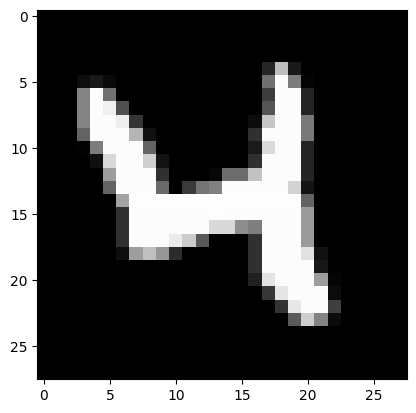

In [223]:
# normalized and flattened data can still be visualized as original data
plt.imshow(X_normalized_train[20].reshape(28,28), cmap='gray')
plt.show()

So, we can see that normalizing does not effect the nature of data. So, we will use this normalized and flattened layer as the input to our neural network.

# **Creating datasets for binary and multiclass classification-**

## **Binary Classification problem-**

MNIST dataset has 10 different target classes, each representing one of the digits from 0-9. Let's consider digits '**0**' and '**1**' for binary classification. We will take only these inputs from the original dataset-

**Creating the dataset-**

In [224]:
#for train data
train_idx = np.where((Y_train==0) | (Y_train==1))# Here we get the index of values 0 and 1
X_train_bin = X_normalized_train[train_idx]
Y_train_bin = Y_train[train_idx]

#for test data
test_idx = np.where((Y_test==0) | (Y_test==1))
X_test_bin = X_normalized_test[test_idx]
Y_test_bin = Y_test[test_idx]

print(f'Trainset shapes - X: {X_train_bin.shape}, Y: {Y_train_bin.shape}')
print(f'Testset shapes - X: {X_test_bin.shape}, Y: {Y_test_bin.shape}')

print(f'\nTrain statistics - 0: {(Y_train_bin==0).sum()}, 1: {(Y_train_bin==1).sum()}')
print(f'Test statistics - 0: {(Y_test_bin==0).sum()}, 1: {(Y_test_bin==1).sum()}')


Trainset shapes - X: (12665, 784), Y: (12665,)
Testset shapes - X: (2115, 784), Y: (2115,)

Train statistics - 0: 5923, 1: 6742
Test statistics - 0: 980, 1: 1135


We now have only 0's and 1's in the newly created subset of the dataset. As we can see that count of 0's and 1's is quite even. So, the dataset is quite evenly balanced.

**Splitting the Training Dataset-**

Often it is observed that training a model for a large number of epochs leads to the model overfitting very much to the training data set. To tackle this issue, we need a validation dataset to keep track of the 'validation performance'. So, we will now split the current training dataset (of 11344 instances) into a training set and validation set.

In [225]:
from sklearn.model_selection import train_test_split

We can use this library to split our data.

In general, a split of 90-10, 80-20, 67-33 etc. is used. You can choose your own value as it is always a tradeoff.

We will go with 80-20 split.

In [226]:
X_train_bin, X_val_bin, Y_train_bin, Y_val_bin = train_test_split(X_train_bin, Y_train_bin, test_size=0.2, random_state = 28)

In [227]:
print("Instances in new train-set:", len(Y_train_bin))
print("Instances in val-set:", len(Y_val_bin))
print("\nCount of 0s and 1s in train-set:", (Y_train_bin==0).sum(), (Y_train_bin==1).sum())
print("Count of 0s and 1s in val-set:", (Y_val_bin==0).sum(), (Y_val_bin==1).sum())

Instances in new train-set: 10132
Instances in val-set: 2533

Count of 0s and 1s in train-set: 4745 5387
Count of 0s and 1s in val-set: 1178 1355


In [228]:
# Transpose feature matrices as per our model requirement

X_train_bin, X_val_bin, X_test_bin = X_train_bin.T, X_val_bin.T, X_test_bin.T
print(f'Shapes - {X_train_bin.shape, X_val_bin.shape, X_test_bin.shape}')

Shapes - ((784, 10132), (784, 2533), (784, 2115))


# **Building the Neural Net class:**

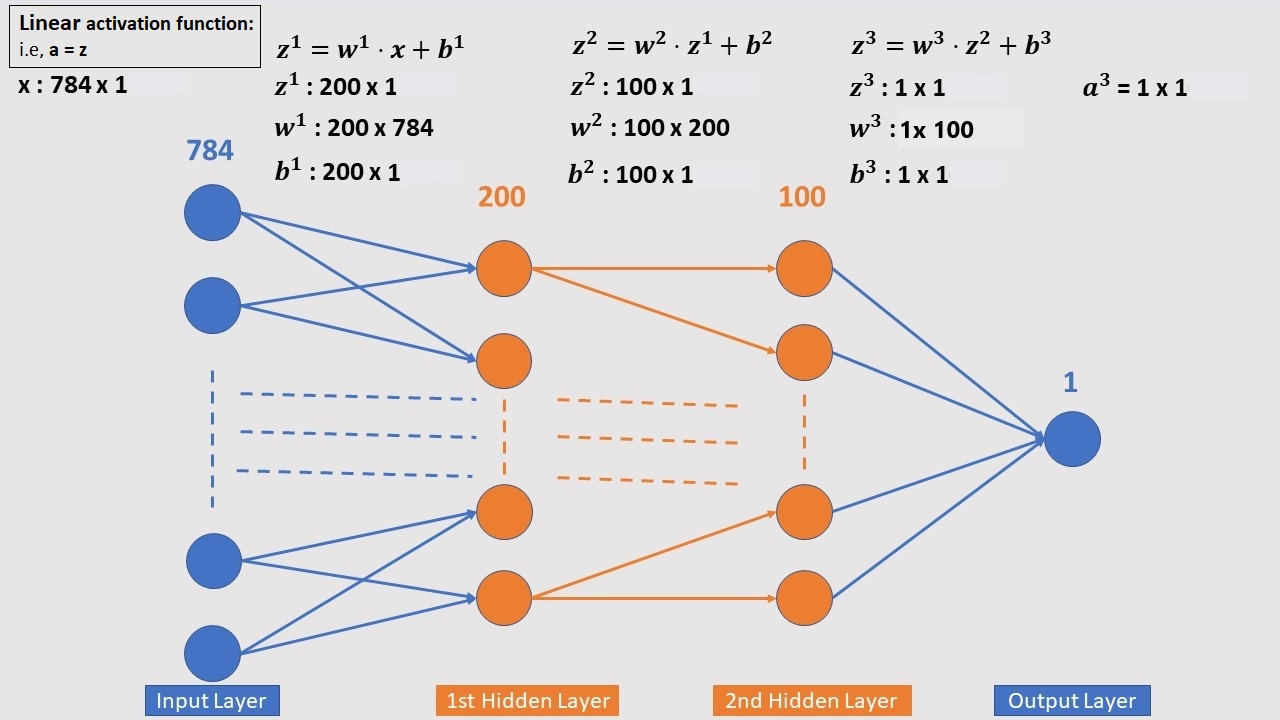


\begin{equation}
    \mathbf{W}
    =
    \begin{bmatrix}
        W^{1} & W^{2}  & W^{3} \\
    \end{bmatrix}
\end{equation}

where, $ \\ $


\begin{equation}
    \mathbf{W^{l}} =
    \begin{bmatrix}
        w_{11} & w_{12} & w_{13} & \dots & w_{1N_{l-1}} \\
        w_{21} & w_{22} & w_{23} & \dots & w_{2N_{l-1}} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        w_{N_{l}1} & w_{N_{l}2} & w_{N_{l}3} & \dots & w_{N_{l}N_{l-1}} \\
    \end{bmatrix}
\end{equation}


Equation:

m : Total number of samples

For input X:


\begin{equation}
    \mathbf{Z^{1}} = \mathbf{W^{1}}\ \mathbf{X} + \mathbf{b^{1}}
\end{equation}

\begin{equation}
    \mathbf{Z^{1}} = \mathbf{W^{1}}
    \begin{bmatrix}
    | & | & \dots & | \\
    \mathbf{X}[1] & \mathbf{X}[2] & \dots & \mathbf{X}[m] \\
    | & | & \dots & |
    \end{bmatrix} +  \begin{bmatrix}
        | & | & \dots & | \\
        \mathbf{b^{1}} & \mathbf{b^{1}} & \dots & \mathbf{b^{1}}\\
        | & | & \dots & |
    \end{bmatrix}
\end{equation}

# **Equations of Backpropagation-**

**Recall:** $W^\ell$ represents the matrix of weights connecting layer $\ell − 1$ to
layer $\ell$.

**Recall:** $δ^\ell$ represents the error gradients with respect to the activations at the layer $\ell$.



# Gradients at the output layer:  

Now, the gradient with respect to weights for output layer would be-

# $\frac{\partial e}{\partial w_{i j}^{L}}=\frac{\partial e}{\partial z_i^{L}} a_j^{L-1}=\frac{\partial e}{\partial a_i^{L}} \phi^{\prime}\left(z_i^{L}\right) a_j^{L-1}$

Collecting these partial derivatives into a matrix we get:

# $\nabla_{W^L} e= \operatorname{Diag}\left({\phi^L}'\right) \delta^L (a^{L-1})^\top$

where

$\delta^L = \begin{bmatrix} \frac{\partial e}{\partial a_1^{L}} \ldots \frac{\partial e}{\partial a_{N_L}^{L}} \end{bmatrix}^\top$.

In code, we have used an equivalent way to represent this:

# $\nabla_{W^L} e=\operatorname{Diag}\left({\phi^L}'\right) \delta^L (a^{L-1})^\top =: \delta^L_z (a^{L-1})^\top$.



Similarly, the gradient with respect to bias at output layer would be-

# $\frac{\partial e}{\partial b_{i}^{L}}=\frac{\partial e}{\partial a_i^{L}} \phi^{\prime}\left(z_i^{L}\right)$

Now, these gradients can be collected into a vector:

# $\nabla_{b^L} e= \operatorname{Diag}\left( \phi^{L'} \right) \delta^L =: \delta_z^L$.



# Gradient in the hidden layer:

The gradient with respect to weights for hidden layers would be-

# $\nabla_{W^{\ell}} e=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \delta^{\ell}\left(a^{\ell-1}\right)^{\top}=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) V^{\ell+1} \ldots V^L \delta^L\left(a^{\ell-1}\right)^{\top}$

$\text { where } V^{\ell+1}=\left(W^{\ell+1}\right)^{\top} \operatorname{Diag}\left(\phi^{\ell+1^{\prime}}\right) \text {. }$

In code, we have used an equivalent way to represent this:

$\nabla_{W^{\ell}} e = \operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \delta^{\ell}\left(a^{\ell-1}\right)^{\top} \\
=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \left(W^{\ell+1}\right)^{\top} \operatorname{Diag}\left(\phi^{\ell+1^{\prime}}\right) \ldots \left(W^{L}\right)^{\top} \operatorname{Diag}\left(\phi^{L^{\prime}}\right) \delta^L\left(a^{\ell-1}\right)^{\top}$.

For the second last layer, we have:

$\nabla_{W^{L-1}} e = \operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \delta^{L-1}\left(a^{L-2}\right)^{\top} \\
=\operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \left(W^{L}\right)^{\top} \operatorname{Diag}\left(\phi^{L^{\prime}}\right) \delta^L\left(a^{L-2}\right)^{\top}\\
= \delta_z^{L-1} \left(a^{L-2}\right)^{\top}
$

where

$\delta_z^{L-1} = \operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \left(W^{L}\right)^{\top} \delta_z^{L}$.


Similarly, for the third last layer we have:

$\nabla_{W^{L-2}} e = \operatorname{Diag}\left(\phi^{{L-2}^{\prime}}\right) \left(W^{L-1}\right)^{\top} \operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \left(W^{L}\right)^{\top} \operatorname{Diag}\left(\phi^{{L}^{\prime}}\right) \delta^{L}\left(a^{L-3}\right)^{\top} \\
= \delta_z^{L-2} \left(a^{L-3}\right)^{\top}
$

where

$\delta_z^{L-2} = \operatorname{Diag}\left(\phi^{{L-2}^{\prime}}\right) \left(W^{L-1}\right)^{\top}  \delta_z^{L-1}$.



And the gradient with respect to bias at hidden layers would be-

# $\nabla_{b^{\ell}} e=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \delta^{\ell}=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) V^{\ell+1} \ldots V^L \delta^L$.

In code, we have used an equivalent way to represent this:

$\nabla_{b^{\ell}} e = \operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \delta^{\ell} \\
=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \left(W^{\ell+1}\right)^{\top} \operatorname{Diag}\left(\phi^{\ell+1^{\prime}}\right) \ldots \left(W^{L}\right)^{\top} \operatorname{Diag}\left(\phi^{L^{\prime}}\right) \delta^L.$

For the second last layer, we have:

$\nabla_{b^{L-1}} e = \operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \left(W^{L}\right)^{\top} \operatorname{Diag}\left(\phi^{L^{\prime}}\right) \delta^L = \operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \left(W^{L}\right)^{\top} \delta^{L}_z = \delta^{L-1}_z$.


For the third last layer, we have:

$\nabla_{b^{L-2}} e = \operatorname{Diag}\left(\phi^{{L-2}^{\prime}}\right) \left(W^{L-1}\right)^{\top} \operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \left(W^{L}\right)^{\top} \operatorname{Diag}\left(\phi^{L^{\prime}}\right) \delta^L = \operatorname{Diag}\left(\phi^{{L-2}^{\prime}}\right) \left(W^{L-1}\right)^{\top} \delta^{L-1}_z = \delta^{L-2}_z$.


In [229]:
class Neural_Network():
    def __init__(self, neurons, Activations, initialization='randn'):
        """Define the NN design parameters
        Args:
            neurons (int array): list of number of neurons in each layer
            Activations (str array): list of activations to be used for hidden and output layers
            initialization (str, optional): Choose weight initialization from
             uniform or normal distribution. Defaults to 'randn'.
        """

        self.inputSize = neurons[0] # Number of neurons in input layer
        self.outputSize = neurons[-1] # Number of neurons in output layer
        self.layers = len(neurons)
        self.weights = [] # weights for each layer
        self.biases = [] # biases in each layer
        self.layer_activations = [] # activations for each layer

        if initialization == 'rand':
            self.initializer = np.random.rand
        elif initialization == 'randn':
            self.initializer = np.random.randn
        else:
           raise ValueError("initialization must be 'rand' or 'randn' or 'he' or 'xavier'")
        for i in range(len(neurons)-1):
            self.weights.append(self.initializer(neurons[i+1],neurons[i])) # weight matrix between layer i and layer i+1
            self.biases.append(self.initializer(neurons[i+1],1))
            self.layer_activations.append(Activations[i]) # activations for each layer


    def sigmoid(self, z):
        """returns result of the sigmoid activation function on input z."""
        ### TODO: implement logistic sigmoid activation function
        z=np.clip( z, -500, 500)
        return 1.0 / (1.0 + np.exp(-z))

    def sigmoidPrime(self,z):
        """returns derivative of sigmoid activation function applied on input z."""
        ### TODO: implement derivative of logistic sigmoid function
        z=np.clip( z, -500, 500)
        return self.sigmoid(z)*(1-self.sigmoid(z))

    def tanh(self, z):  #transforms values to -1 to 1
        ### TODO: implement tanh sigmoid activation function
        z=np.clip( z, -500, 500)
        return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

    def tanhPrime(self,z):
        """returns derivative of hyperbolic tan activation function applied on input z."""
        ### TODO: implement derivative of tanh sigmoid activation function
        z=np.clip( z, -500, 500)
        return 1 - self.tanh(z) ** 2

    def linear(self, z):
        """returns result of the linear activation function on input z."""
        ### TODO: implement linear activation function
        z=np.clip( z, -500, 500) # To prevent overflow
        return z

    def linearPrime(self,z):
        """returns derivative of linear activation function applied on input z."""
        ### TODO: implement derivative of linear activation function\
        z=np.clip( z, -500, 500) # To prevent overflow
        return 1-(z==np.nan) # to broadcast 1 to same shape

    def ReLU(self,z):
        """returns result of the ReLU activation function on input z."""
        ### TODO: implement ReLU activation function
        z=np.clip( z, -500, 500 )
        return np.maximum(z, 0)

    def ReLUPrime(self,z):
        """returns derivative of ReLU activation function applied on input z."""
        ### TODO: implement derivative of ReLU activation function
        z=np.clip( z, -500, 500)
        return z >= 0

    def sReLU(self, z):
        """returns result of the sReLU activation function on input z."""
        z=np.clip( z, -500, 500) # To prevent overflow
        return z*self.tanh(np.log(1 + np.exp(z)))

    def sReLUPrime(self, z):
        """returns the derivative of the sReLU activation function on input z."""
        z=np.clip( z, -500, 500) # To prevent overflow
        return self.tanh(np.log(1 + np.exp(z))) + z * self.tanhPrime(np.log(1 + np.exp(z))) * np.exp(z) / (1 + np.exp(z))

    def SSIG(self, z):
        """returns the result of the SSIG activation function on input z."""
        alpha = 5
        z=np.clip( z, -500, 500) # To prevent overflow
        return alpha * z / (1 + np.abs(alpha * z))

    def SSIGPrime(self, z):
        """returns the sub-derivative of the SSIG activation function on input z."""
        alpha = 5
        z=np.clip( z, -500, 500) # To prevent overflow
        return alpha / (1 + np.abs(alpha * z) ** 2)

    def softmax(self, z):
        """returns result of the softmax activation function on input z."""
        ### TODO: implement softmax function
        z=np.clip( z, -500, 500) # To prevent overflow
        return np.exp(z) / np.sum(np.exp(z), axis = 0)

    def softmaxPrime(self,z):
        """returns the derivative of the softmax activation function on input z."""
        z=np.clip( z, -500, 500) # To prevent overflow
        return self.softmax(z)*(1-self.softmax(z))

    def lossSE(self, predicted, actual):
        """Implementation of Squared-error loss function."""
        ### TODO: implement squared error loss function
        return np.mean(0.5 * (predicted - actual) ** 2)

    def lossCE(self, predicted, actual):
        """Implementation of Cross-Entropy loss function."""
        ### TODO: implement cross-entropy loss function
        return - np.sum(actual * np.log(predicted + 1e6))


    def forward(self, x):
        """Defines forward pass of the NN

        Args:
            x (array): input of size self.inputSize

        Returns:
            a (array): output of the forward pass
            layer_dot_prod_z (list): layerwise intermediate outputs
            layer_activations_a (list): layerwise activations
        """

        layer_activations_a = [] # store the outputs of activation
        a=x  ## storing input as activation of zero-th layer
        layer_dot_prod_z = []
        for i, param in enumerate(zip(self.biases, self.weights)):
            b, w = param[0], param[1]

            ### TODO: implement the computation of z
            z = np.dot(w, a) + b  # Compute z
            # print(z.shape)

            if self.layer_activations[i].lower()=='sigmoid':
                a = self.sigmoid(z)
            elif self.layer_activations[i].lower()=='relu':
                a = self.ReLU(z)
            elif self.layer_activations[i].lower()=='tanh':
                a = self.tanh(z)
            elif self.layer_activations[i].lower()=='linear':
                a = self.linear(z)
            elif self.layer_activations[i].lower()=='srelu':
                a = self.sReLU(z)
            elif self.layer_activations[i].lower()=='ssig':
                a = self.SSIG(z)
            elif self.layer_activations[i].lower()=='softmax':
                a = self.softmax(z)
            else:
              print("Ex")
            layer_dot_prod_z.append(z)
            layer_activations_a.append(a)
        return a, layer_dot_prod_z, layer_activations_a

    def backward(self, x, y, zs, activations):
        """backward pass to calculate gradient of loss w.r.t. NN parameters

        Args:
            x (array): input
            y (array): ouputs from forward pass
            zs (list): layerwise intermediate outputs from forward pass
            activations (list): layerwise activations from forward pass

        Returns:
            [tuple]: gradients with respect to bias and weight parameters respectively
        """

        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]

        #### TODO: implement backpropagation for computation of gradients
        n = zs[-1].shape[1]
        H = self.layers-2 # Remove output and input layer
        #print("zs l", zs[l].shape, "zs l-1", zs[l-1].shape)
        for l in range(H, -1, -1):
          if self.layer_activations[l].lower()=='sigmoid':
              prime = self.sigmoidPrime(zs[l])
          elif self.layer_activations[l].lower()=='relu':
              prime = self.ReLUPrime(zs[l])
          elif self.layer_activations[l].lower()=='tanh':
              prime = self.tanhPrime(zs[l])
          elif self.layer_activations[l].lower()=='linear':
              prime = self.linearPrime(zs[l])
          elif self.layer_activations[l].lower()=='srelu':
              prime = self.sReLUPrime(zs[l])
          elif self.layer_activations[l].lower()=='ssig':
              prime = self.SSIGPrime(zs[l])
          elif self.layer_activations[l].lower()=='softmax':
              prime = self.softmaxPrime(zs[l])

          if l==H:
              delta_l = (activations[l] - y) * prime
          else:
              delta_l = prime * np.dot(self.weights[l+1].T, delta_l)
          grad_b[l] = np.sum(delta_l, axis=1, keepdims=True) / n
          grad_w[l] = np.dot(delta_l, activations[l-1].T) / n if l!=0 else np.dot(delta_l, x.T) / n

        return (grad_b, grad_w)

    def update_parameters(self, grads, lr):
        """update the NN parameters using the gradients

        Args:
            grads (list): gradients obtained from backward pass
            lr (float): learning rate of NN
        """

        grad_b, grad_w = grads[0], grads[1]

        ### TODO: implement updation of bias and weight parameters
        for i in range(len(self.weights)):
            self.weights[i] -= lr*grad_w[i]
            self.biases[i] -= lr*grad_b[i]



    def error(self, X, Y, errors):
        """Appends loss to error list"""
        y = np.squeeze(self.forward(X)[0])
        errors.append(self.loss(y, Y))

    def copy_params(self):
        """Returns a copy of current NN parameters"""
        weights = [w.copy() for w in self.weights]
        biases = [b.copy() for b in self.biases]
        return (weights, biases)

    def train(self, X, Y, lr = 1e-3, max_epochs = 1000, patience=5, batch_size = None, grad_show = True,
              n_classes=10, onehotencoded=False, loss_func='SE', Xval=None, Yval=None, verbose=True):
        """Function for training our Neural Network

        Args:
            X (ndarray): feature matrix of training data,
             Shape: (n,m) where n is no. of features and m is no. of samples.
            Y (ndarray): ground truth of training data, NOT one-hot-encoded. Shape: (1,m).
            lr (float or function, optional): constant learning rate or scheduler function.
             Defaults to 1e-3 constant lr.
            max_epochs (int, optional): epoch cap for training. Defaults to 1000.
            patience (int, optional): patience parameter for early stopping. Defaults to 5.
            batch_size (int, optional): mini-batch size. Defaults to full-batch GD if not provided.
            n_classes (int, optional): no. of classes for multi-class classification required if
            one-hot encoding is set to True. Defaults to 10.
            onehotencoded (bool, optional): Defaults to False.
            loss_func (str, optional): Choose from 'SE' and 'CE' loss functions. Defaults to 'SE'.
            Xval (ndarray, optional): Validation data feature matrix. Defaults to None.
            Yval (ndarray, optional): Validation data ground truth. Defaults to None.
            verbose (bool, optional): If True, displays logs and progress of training. Defaults to True.

        Returns:
            [list/tuple]: lists of train-set and validation-set losses seen over the traning process.
        """

        if onehotencoded:
            # a method for creating one hot encoded labels
            def onehotencoding(Y, n):
                # one-hot encoding of class i is just the ith column of the identity
                # matrix of size n where n is the total number of classes. so below
                # code uses Y (a 1d array) for indexing into the identity matrix.

                ### TODO: return one-hot encoding for Y
                return np.eye(n)[Y].T

            Y = onehotencoding(Y, n_classes)
            if Yval is not None:
                Yval = onehotencoding(Yval, n_classes)

        # Below code ensures that Y is 2-dimensional even when one-hot encoding is not
        # performed, so our same code works for training NN for both tasks.
        Y = np.expand_dims(Y,0) if len(Y.shape) == 1 else Y
        Yval = np.expand_dims(Yval,0) if (Yval is not None and len(Yval.shape) == 1) else Yval

        if loss_func == 'SE':
            self.loss = self.lossSE
        elif loss_func == 'CE':
            self.loss = self.lossCE

        train_errors=[]
        if Xval is not None:
            val_errors=[]
        i, j, v = 0, 0, np.inf     ## i -> epoch, j->patience, v ->best loss
        best_params = self.copy_params()

        if batch_size is not None:
            if batch_size > len(X[0]):
                raise ValueError("invalid mini-batch size. Must be smaller than dataset length")
        else:   ## if batch_size is not given
            batch_size = len(X[0])

        #LR control function

        if isinstance(lr, (float, int)):# constant Ir arg is passed to train get_ir lambda x: 1r # we return a function object which returns the same ir at every epoc elif callable(lr): # function in arg is passed to train
           get_lr =lambda X: lr # the function is then used to get in for a particular epoch else: raise ValueError('param Ir can only be a number or a scheduler function")
        elif callable(lr):
          get_lr =lr
        else:
          raise ValueError('param lr can only be a number or a scheduler function')


        gradient_w = np.zeros((self.layers-1, max_epochs))
        gradient_b = np.zeros((self.layers-1, max_epochs))

        while j < patience:

            ### TODO: Implement the training algorithm with option for mini-batches
            # Shuffle Dataset
            idx = np.arange(len(X[0]))
            np.random.shuffle(idx)
            X1 = np.take(X, idx, axis = -1)
            Y1 = np.take(Y, idx, axis = -1)

            #for every batch do
            for q in range(0, len(X1[0]), batch_size):

                start, end = q, min(len(X1[0]), q+batch_size)
                train_x = X1[:, start:end]
                train_y = Y1[:, start:end]

                #do forward pass
                out, dot_prod_z, activations_a = self.forward(train_x)

                #compute gradients using backpropagation
                grads = self.backward(train_x, train_y, dot_prod_z, activations_a)

                #update parameters
                self.update_parameters(grads, get_lr(i))

                # Store current gradients and biases
                for layer in range(self.layers-1):  #storing mean gradients
                    gradient_w[layer][i] = np.sqrt(np.mean(grads[0][layer]**2))
                    gradient_b[layer][i] = np.sqrt(np.mean(grads[0][layer]**2))

            i += 1 # increment epoch count

            self.error(X, Y, train_errors)   ### appending the loss to train_errors
            if Xval is not None:
                self.error(Xval, Yval, val_errors)    ## appending the val_loss to errors

                if val_errors[-1] < v:
                    j = 0 # reset patience counter
                    v = val_errors[-1] # update best loss
                    best_params = self.copy_params() # save params
                else:
                    j += 1 # increment patience counter

            if verbose and i%5 == 0:
                log = f"Epoch {i}..............Loss on train = {train_errors[-1]}"
                if Xval is not None:
                    log += f", Loss on val = {val_errors[-1]}"
                print(log)

            if i >= max_epochs:
                break # stop if epoch threshold crossed

        if Xval is not None:
            if i >= max_epochs and verbose:
                print("Reached Epoch Cap without convergence....Terminating")
            elif verbose:
                print("Early Stopping .............. Returning best weights")

            self.weights, self.biases = best_params # reset to best params

        if verbose:
            x = np.arange(1, len(train_errors)+1)
            plt.plot(x, train_errors, label="Loss on Train")
            if Xval is not None:
                plt.plot(x, val_errors, label="Loss on Val")
            plt.legend()
            plt.title(f"{loss_func} - Learning Rate = {lr}")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.show()

            if grad_show:

                fig, ax = plt.subplots(1, self.layers-1, figsize=(20, 8))

                for i in range(self.layers-1):
                    ax[i].plot(gradient_w[i])
                    ax[i].set_title(f"Gradient w.r.t. weights - layer {i+1}")
                    ax[i].set_xlabel("Epoch")
                    ax[i].set_ylabel("Gradient (weights)")
                plt.show()
                print("\n")
                fig, ax = plt.subplots(1, 1, figsize=(10, 10))

                for i in range(self.layers-1):
                    ax.plot(gradient_w[i], label=f"layer {i+1}")
                ax.set_title("Gradient w.r.t. weights")
                ax.set_xlabel("Epoch")
                ax.set_ylabel("Gradient (weights)")
                ax.legend()
                plt.show()
                print("\n")


                fig, ax = plt.subplots(1, self.layers-1, figsize=(20, 8))

                for i in range(self.layers-1):
                    ax[i].plot(gradient_b[i])
                    ax[i].set_title(f"Gradient w.r.t. biases - layer {i+1}")
                    ax[i].set_xlabel("Epoch")
                    ax[i].set_ylabel("Gradient (biases)")
                plt.show()
                print("\n")

                fig, ax = plt.subplots(1, 1, figsize=(10, 10))

                for i in range(self.layers-1):
                    ax.plot(gradient_b[i], label=f"layer {i+1}")
                ax.set_title("Gradient w.r.t. biases")
                ax.set_xlabel("Epoch")
                ax.set_ylabel("Gradient (biases)")
                ax.legend()
                plt.show()
                print("\n")

        if Xval is not None:
            return (train_errors, val_errors)
        return train_errors

    def predict(self, x):
      ### TODO: implement prediction for binary and multi-class classification
      temp = self.forward(x)[0]
      if self.outputSize==1: # binary classification
        temp = np.squeeze(temp)
        pred_class = [0 if pred < 0.5 else 1 for pred in temp]
      else: # multi-class classification
        pred_class = np.argmax(temp.T, axis=1)
      return pred_class

**Creating a MLP (Feed forward NN) model instance for our Binary classification task :**

To create a simple feed-forward neural network.

* Number of input neurons / Number of features = 784.
* Number of output layer neurons = 1.

The number of hidden layers and number of neurons in each hidden layer has been decided arbitrarily.

In [230]:
#D_in is input dimension
#H1 is dimension of first hidden layer
#H2 is dimension of second hidden layer
#D_out is output dimension.

D_in, H1, H2, D_out = 784, 200, 100, 1 #You can add more layers or more outputs if you wish.

neurons = [D_in, H1, H2, D_out] # list of number of neurons in the layers sequentially.
activation_functions = ['sReLU','sReLU','sigmoid'] # activations in each layer (Note: the input layer does not have any activation)
nn_bin = Neural_Network(neurons, activation_functions) 

In [231]:
print(X_train_bin.shape)

(784, 10132)


## Training the model:

Epoch 5..............Loss on train = 0.011391806152490306, Loss on val = 0.010067678158733466
Epoch 10..............Loss on train = 0.007783344351284692, Loss on val = 0.005328620164694933
Epoch 15..............Loss on train = 0.0050992347475257455, Loss on val = 0.004341755875518777
Epoch 20..............Loss on train = 0.003799800671252584, Loss on val = 0.003944396669410057
Early Stopping .............. Returning best weights


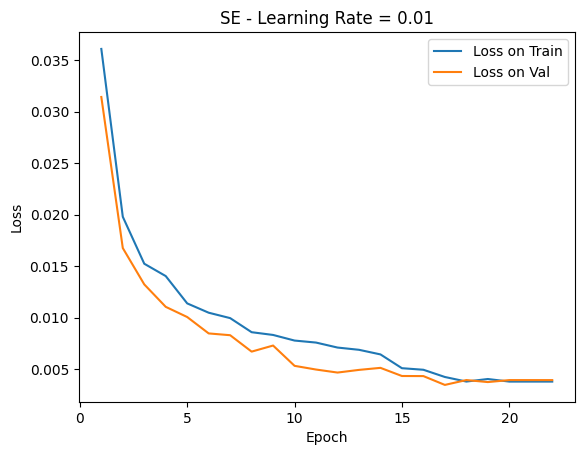

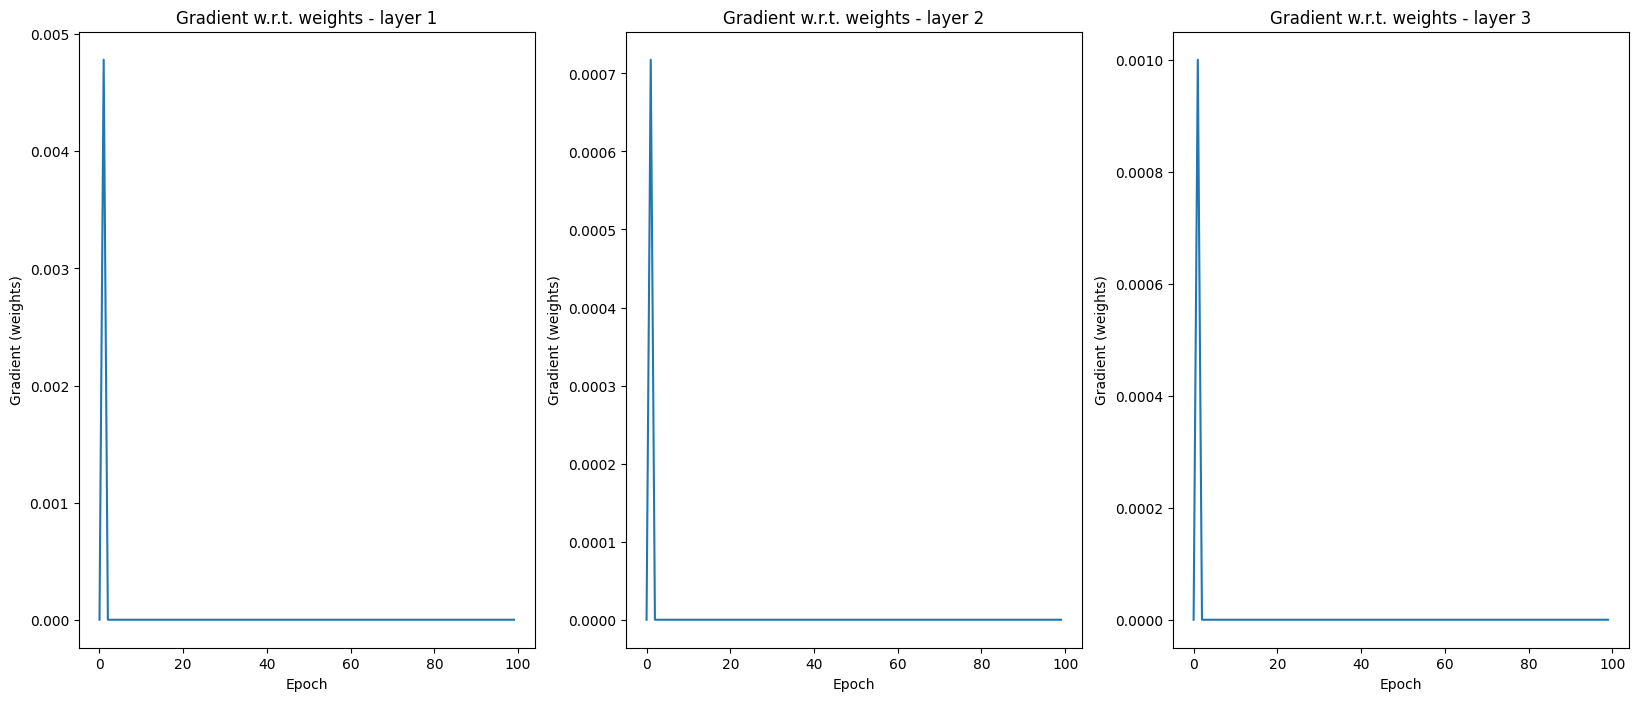

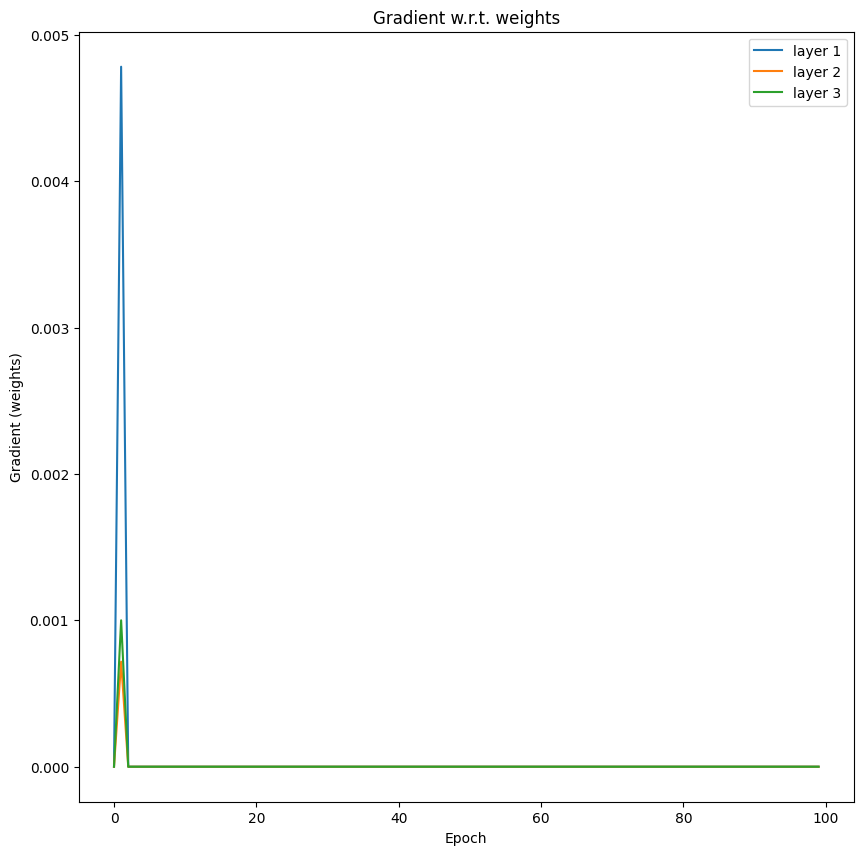

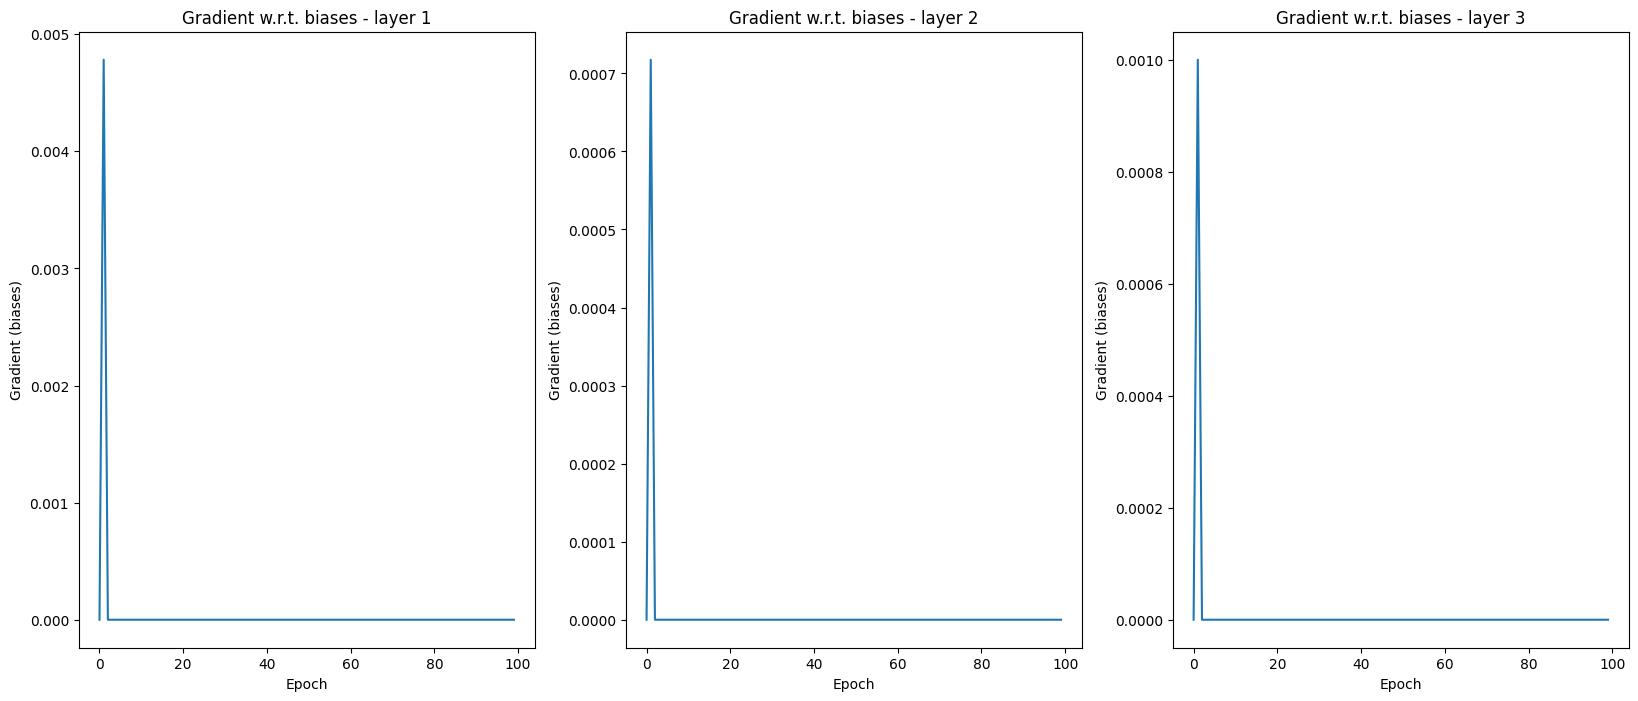

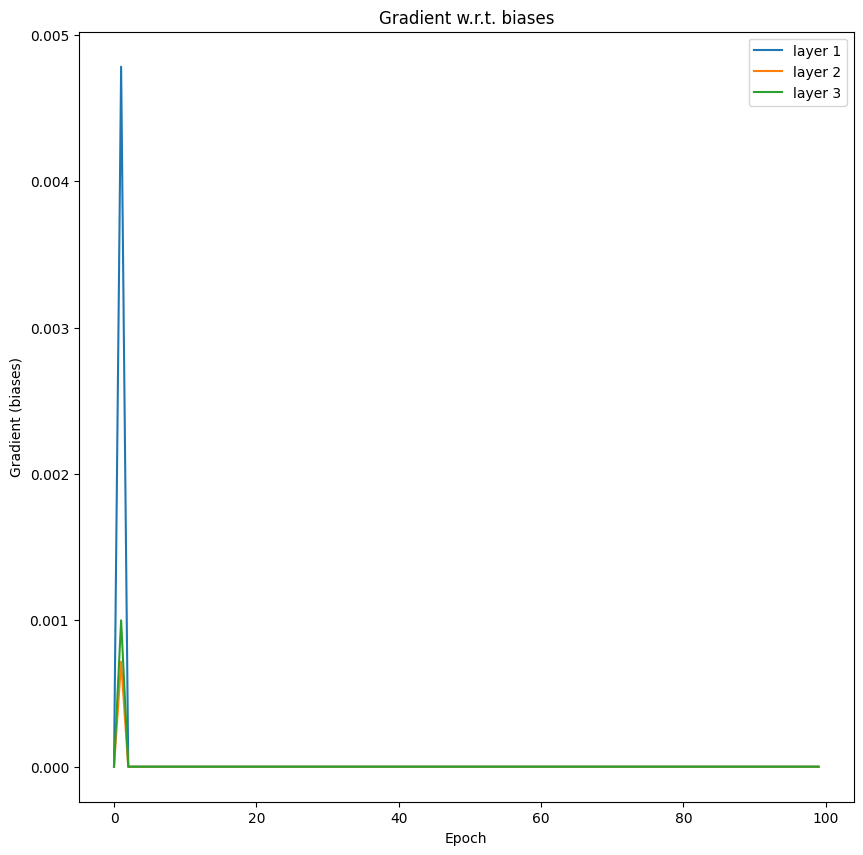

In [232]:
losses = nn_bin.train(X_train_bin, Y_train_bin, batch_size=10, lr=1e-2, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin, verbose= True)

## Testing the model:

In [233]:
print("First 10 outputs    :", Y_test_bin[:10])
preds = nn_bin.predict(X_test_bin[:,:10])
print("First 10 predictions:", preds)

First 10 outputs    : [1 0 1 0 0 1 0 0 1 1]
First 10 predictions: [1, 0, 1, 0, 0, 1, 0, 0, 1, 1]


Now it's time to check the accuracy of our model on the entire dataset:

In [234]:
Y_pred_bin = nn_bin.predict(X_test_bin)

## Checking the accuracy:


In [235]:
### TODO: Compute accuracy
accuracy = np.mean(Y_pred_bin == Y_test_bin)

print("Model accuracy =", round(accuracy*100,2),"%")

Model accuracy = 99.48 %


As we can see that the model has not converged yet, so we can increse the epochs further.

## Confusion Matrix:


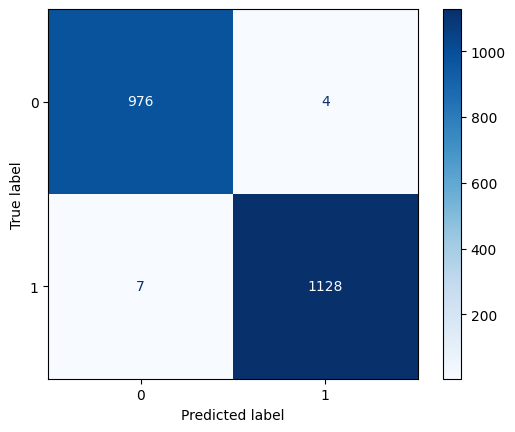

In [236]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matrix_bin = confusion_matrix(Y_test_bin, Y_pred_bin)
ConfusionMatrixDisplay(matrix_bin, display_labels=[0,1]).plot(cmap="Blues", values_format='')
plt.show()

We further can improve the results by:

* Increasing the number of epochs
* Changing the hidden layer format
* Changing the hyperparameters(Called hyperparameter tuning)


<br><br><br><br>

### **Multi-class Classification problem:**
We will do the same thing, with multiple classes this time. We will consider the digits **'2', '4', '6',** and **'8'**.

In [237]:
train_idx = np.where((Y_train==2) | (Y_train==4) | (Y_train==6) | (Y_train==8))
X_train_multiclass = X_normalized_train[train_idx]
Y_train_multiclass = Y_train[train_idx]

test_idx = np.where((Y_test==2) | (Y_test==4) | (Y_test==6) | (Y_test==8))
X_test_multiclass = X_normalized_test[test_idx]
Y_test_multiclass = Y_test[test_idx]

print(f'Trainset shapes - X: {X_train_multiclass.shape}, Y: {Y_train_multiclass.shape}')
print(f'Testset shapes - X: {X_test_multiclass.shape}, Y: {Y_test_multiclass.shape}')

print(f'\nTrain statistics - 2: {(Y_train_multiclass==2).sum()}, 4: {(Y_train_multiclass==4).sum()}, 6: {(Y_train_multiclass==6).sum()}, 8: {(Y_train_multiclass==8).sum()}')
print(f'Test statistics - 2: {(Y_test_multiclass==2).sum()}, 4: {(Y_test_multiclass==4).sum()}, 6: {(Y_test_multiclass==6).sum()}, 8: {(Y_test_multiclass==8).sum()}')

Trainset shapes - X: (23569, 784), Y: (23569,)
Testset shapes - X: (3946, 784), Y: (3946,)

Train statistics - 2: 5958, 4: 5842, 6: 5918, 8: 5851
Test statistics - 2: 1032, 4: 982, 6: 958, 8: 974


In [238]:
# Setting label correct labels for multi class classification

Y_train_multiclass[Y_train_multiclass==2] = 0
Y_test_multiclass[Y_test_multiclass==2] = 0

Y_train_multiclass[Y_train_multiclass==4] = 1
Y_test_multiclass[Y_test_multiclass==4] = 1

Y_train_multiclass[Y_train_multiclass==6] = 2
Y_test_multiclass[Y_test_multiclass==6] = 2

Y_train_multiclass[Y_train_multiclass==8] = 3
Y_test_multiclass[Y_test_multiclass==8] = 3

In [239]:
X_train_multiclass, X_val_multiclass, Y_train_multiclass, Y_val_multiclass = train_test_split(X_train_multiclass, Y_train_multiclass, test_size=0.2, random_state = 1)

In [240]:
print(f'Trainset shapes - X: {X_train_multiclass.shape}, Y: {Y_train_multiclass.shape}')
print(f'Valset shapes - X: {X_val_multiclass.shape}, Y: {Y_val_multiclass.shape}')

print(f'\nTrain statistics - 2: {(Y_train_multiclass==0).sum()}, 4: {(Y_train_multiclass==1).sum()}, 6: {(Y_train_multiclass==2).sum()}, 8: {(Y_train_multiclass==3).sum()}')
print(f'Val statistics - 2: {(Y_val_multiclass==0).sum()}, 4: {(Y_val_multiclass==1).sum()}, 6: {(Y_val_multiclass==2).sum()}, 8: {(Y_val_multiclass==3).sum()}')

Trainset shapes - X: (18855, 784), Y: (18855,)
Valset shapes - X: (4714, 784), Y: (4714,)

Train statistics - 2: 4811, 4: 4684, 6: 4676, 8: 4684
Val statistics - 2: 1147, 4: 1158, 6: 1242, 8: 1167


In [241]:
# Traspose feature matrices as per our model requirement

X_train_multiclass, X_val_multiclass, X_test_multiclass = X_train_multiclass.T, X_val_multiclass.T, X_test_multiclass.T
print(f'Shapes - {X_train_multiclass.shape, X_val_multiclass.shape, X_test_multiclass.shape}')

Shapes - ((784, 18855), (784, 4714), (784, 3946))


In [242]:
Y_train_multiclass.shape

(18855,)

In [243]:
# Creating model instance

D_in, H1, H2, H3, D_out = 784, 300, 200, 100, 4 # As there are 4 classes
neurons = [D_in, H1, H2, H3, D_out]
activation_functions = ['srelu','srelu','srelu','softmax'] # activations in each layer (Note: the input layer does not have any activation)
nn_multiclass = Neural_Network(neurons, activation_functions)
# losses = nn_multiclass.train(X_train_multiclass, Y_train_multiclass, batch_size=10, lr=1e-2, max_epochs=100, n_classes = 4,
                            #  onehotencoded=True, loss_func='CE', Xval = X_val_multiclass, Yval = Y_val_multiclass)

In [244]:
# checking first 10 predictions

print("First 10 outputs    :", Y_test_multiclass[:10])
preds = nn_multiclass.predict(X_test_multiclass[:, :10])
print("First 10 predictions:", preds)

First 10 outputs    : [0 1 1 2 1 2 2 1 1 1]
First 10 predictions: [2 2 2 0 2 0 0 0 2 1]


In [245]:
Y_pred_multiclass = nn_multiclass.predict(X_test_multiclass)

## Model accuracy:


In [246]:
### TODO: Compute multiclass classification accuracy
multiclass_accuracy = np.mean(np.array([Y_test_multiclass[i] == Y_pred_multiclass[i] for i in range(len(Y_pred_multiclass))]))
print("Model accuracy =", round(multiclass_accuracy*100,2),"%")

Model accuracy = 20.22 %


## Confusion matrix:

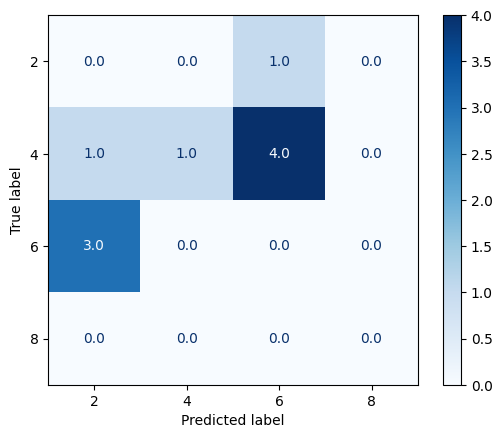


Label totals in dataset:
 [(2, 1.0), (4, 6.0), (6, 3.0), (8, 0.0)]


In [247]:
num_classes = len(np.unique(Y_test_multiclass)) # Assuming classes are labeled 0 to num_classes-1
matrix_multiclass = np.zeros((num_classes, num_classes))

for true_label, pred_label in zip(Y_test_multiclass, preds):
    matrix_multiclass[true_label][pred_label] += 1

ConfusionMatrixDisplay(matrix_multiclass,  display_labels=[2,4,6,8]).plot(cmap="Blues", values_format='')
plt.show()
print("\nLabel totals in dataset:\n", list(zip([2,4,6,8], np.sum(matrix_multiclass, axis=-1))))

# Answers to Assignment Questions have been highlighted below
## Question 1

### Part A
> The linear activation function is given by linear(z) = z. Implement the python functions to compute linear(z) and its gradient.

- In all the cases clipping has been done to prevent overflow.

Implemented in the template code above. Adding here for readability.

```
def linear(self, z):
    """returns result of the linear activation function on input z."""
    ### TODO: implement linear activation function
    z=np.clip( z, -500, 500) # To prevent overflow
    return z

def linearPrime(self,z):
    """returns derivative of linear activation function applied on input z."""
    ### TODO: implement derivative of linear activation function\
    z=np.clip( z, -500, 500) # To prevent overflow
    return 1-(z==np.nan) # to broadcast 1 to same shape
```

### Part B
> Implementing the python functions to compute the following activation function called SRELU given by SRELU(z) = z * tanh(log(exp(z)+1)) and its gradient by using the tanh activation function which has been already implemented.

Implemented in template code above, adding here for better readability

```
def sReLU(self, z):
    """returns result of the sReLU activation function on input z."""
    z=np.clip( z, -500, 500) # To prevent overflow
    return z*self.tanh(np.log(1 + np.exp(z)))

def sReLUPrime(self, z):
    """returns the derivative of the sReLU activation function on input z."""
    z=np.clip( z, -500, 500) # To prevent overflow
    return self.tanh(np.log(1 + np.exp(z))) + z * self.tanhPrime(np.log(1 + np.exp(z))) * np.exp(z) / (1 + np.exp(z))
```



### Part C
> Consider another activation function called SSIG given by SSIG(z) = αz / (1+|αz|) with α=5. Write python functions to compute the SSIG activation function and its sub-gradient.

Implemented in template code above, adding here for better readability

```
def SSIG(self, z):
    """returns the result of the SSIG activation function on input z."""
    alpha = 5
    z=np.clip( z, -500, 500) # To prevent overflow
    return alpha * z / (1 + np.abs(alpha * z))

def SSIGPrime(self, z):
    """returns the sub-derivative of the SSIG activation function on input z."""
    alpha = 5
    z=np.clip( z, -500, 500) # To prevent overflow
    return alpha / (1 + np.abs(alpha * z) ** 2)
```

### Part D
> Consider an appropriate neural network architecture where each hidden layer has only sReLU activation functions and the output layer has a logistic sigmoid activation function. Illustrate the exploding gradient and vanishing gradient problems in this network. Justify the architecture you used, indicate how you checked the exploding gradient and vanishing gradient problems, and explain your observations.

**Creating a MLP (Feed forward NN) model instance for our Binary classification task :**

Let's now create a simple feed-forward neural network.

* Number of input neurons = 784.
* Number of output layer neurons = 1.

The number of hidden layers and number of neurons in each hidden layer can be decided by the user.

In [248]:
# D_in is input dimension
# H1 is dimension of first hidden layer
# H2 is dimension of second hidden layer
# D_out is output dimension.

D_in, H1, H2, D_out = 784, 200, 100, 1
neurons = [D_in, H1, H2, D_out] # list of number of neurons in the layers sequentially.
activation_functions = ['sReLU','sReLU','sigmoid'] # activations in each layer (Note: the input layer does not have any activation)
nn_bin_sReLU = Neural_Network(neurons, activation_functions) # Creating our neural network.

Epoch 5..............Loss on train = 0.022219954956678865, Loss on val = 0.02088064946483434
Epoch 10..............Loss on train = 0.010507660156463566, Loss on val = 0.010704058353030567
Epoch 15..............Loss on train = 0.008805062502094755, Loss on val = 0.008174479559598222
Epoch 20..............Loss on train = 0.005617451315728701, Loss on val = 0.005234110252459647
Epoch 25..............Loss on train = 0.004354452101216786, Loss on val = 0.0045254762464502045
Epoch 30..............Loss on train = 0.0035190460940908194, Loss on val = 0.0031582984082921756
Epoch 35..............Loss on train = 0.0033235882084467344, Loss on val = 0.002960915896831412
Early Stopping .............. Returning best weights


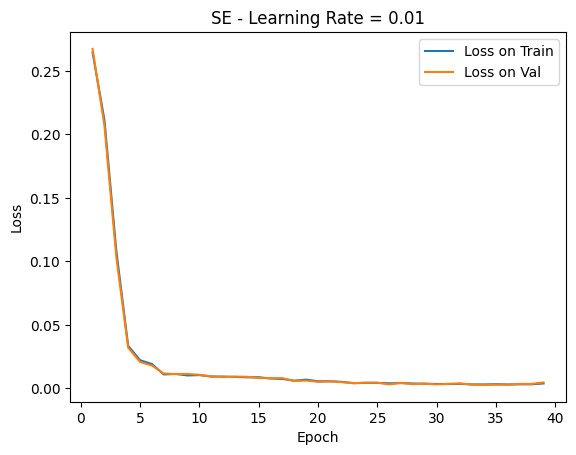

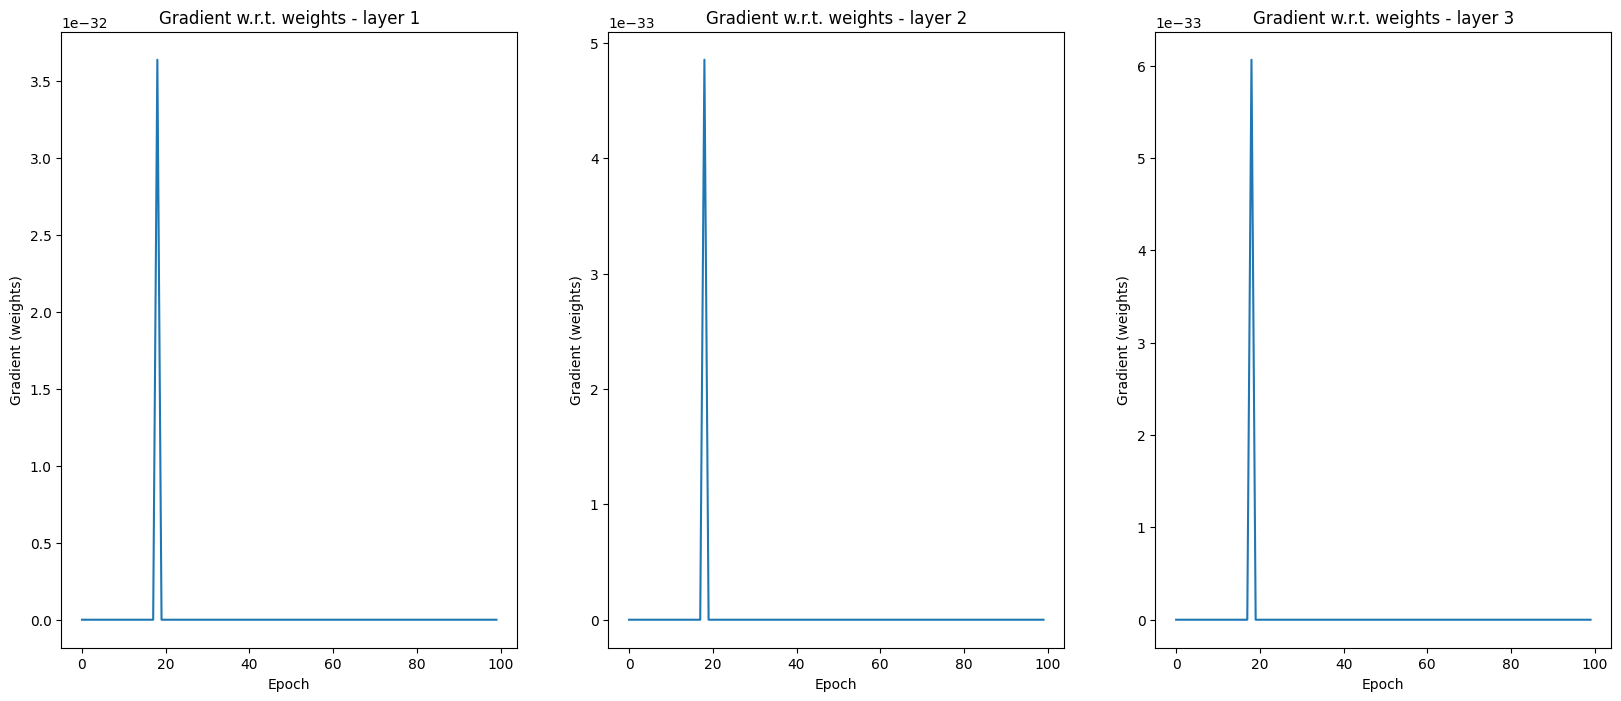

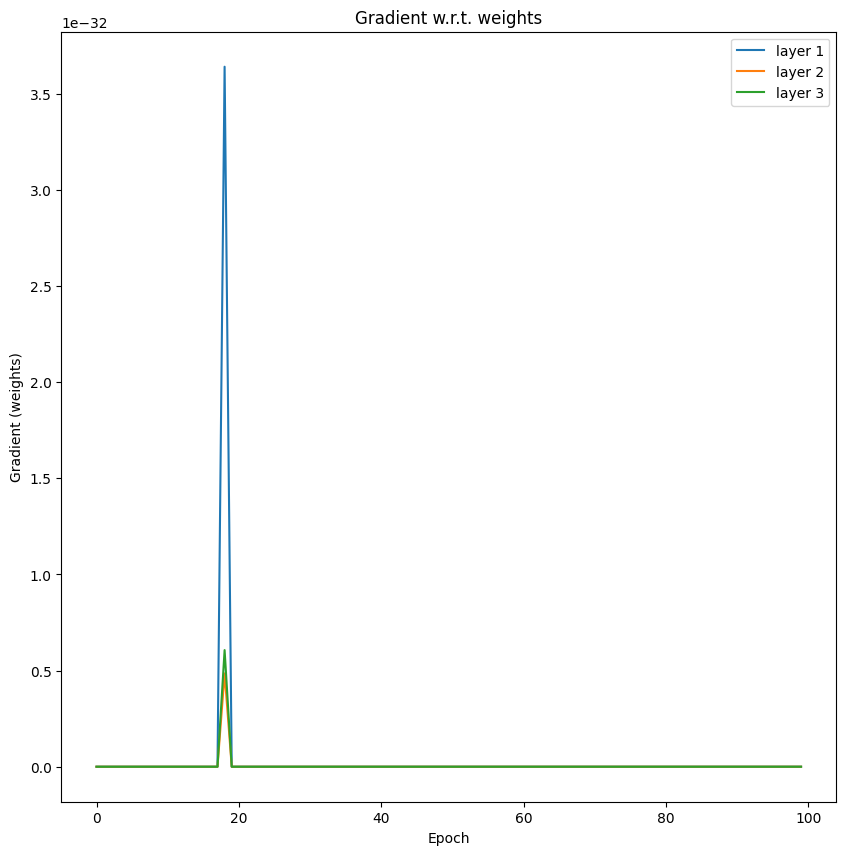

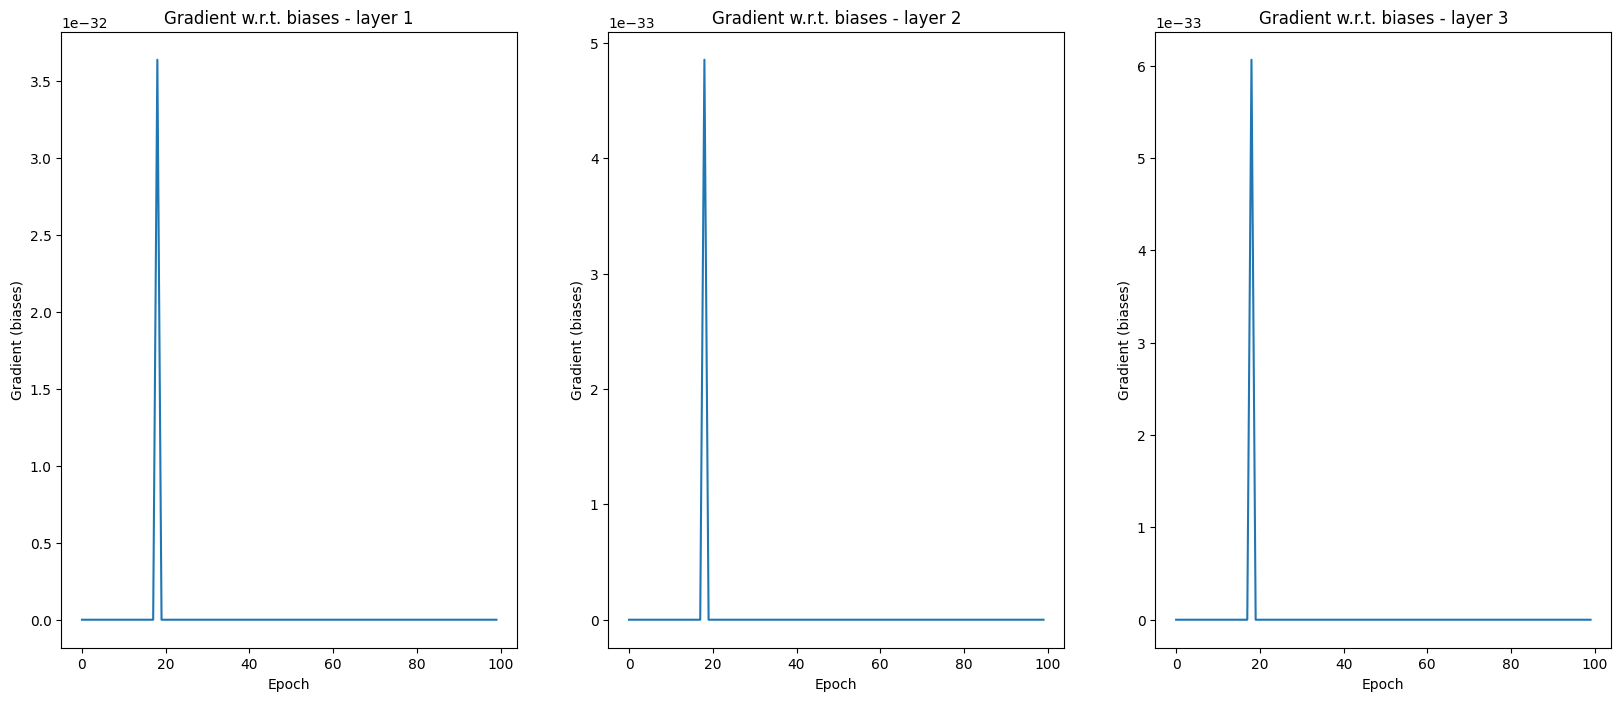

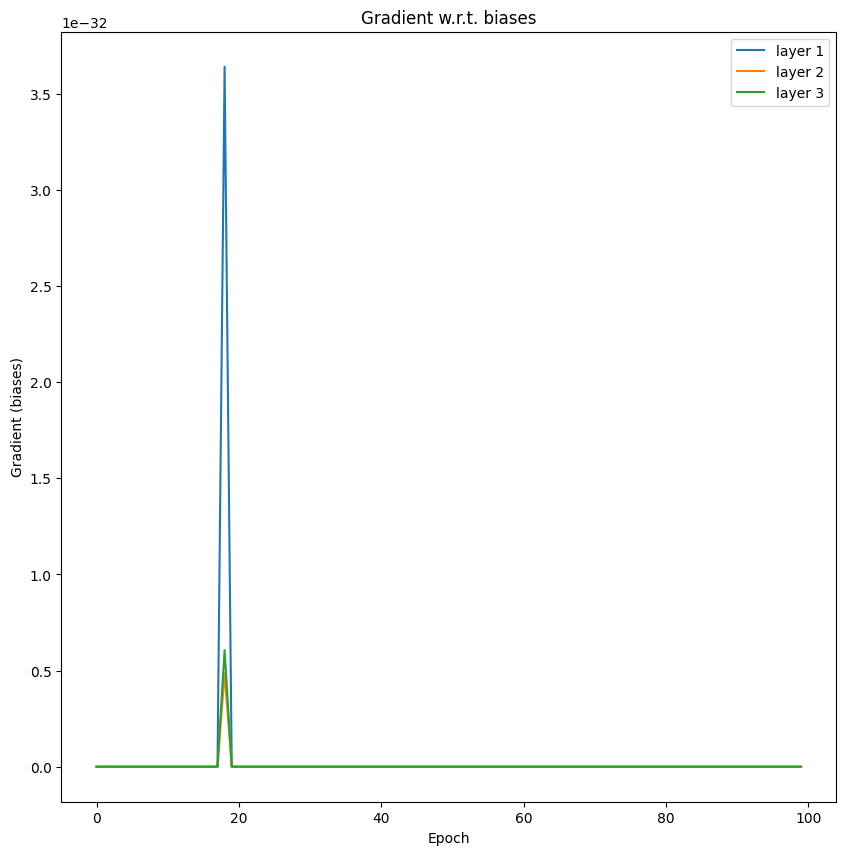

In [249]:
# Train the model
losses = nn_bin_sReLU.train(X_train_bin, Y_train_bin, batch_size=10, lr=1e-2, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin, verbose= True)

### COMMENTS:
- As we can see in the gradient vs. epoch graphs above, the weights and biases dive to zero in less than 5 epochs. This is very clearly a `vanishing gradient` problem, where the weights become increasingly small as epochs increase. In this case as we can see there approximately no change in weights wrt Epoch.

Model accuracy =

 99.62 %


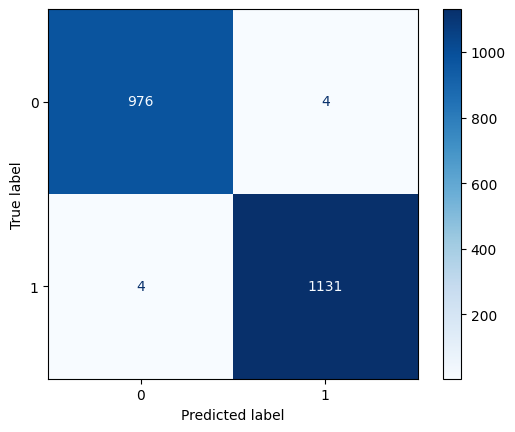

In [250]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Y_pred_bin = nn_bin_sReLU.predict(X_test_bin)

accuracy = np.mean(Y_pred_bin == Y_test_bin)
print("Model accuracy =", round(accuracy*100,2),"%")

matrix_bin = confusion_matrix(Y_test_bin, Y_pred_bin)
ConfusionMatrixDisplay(matrix_bin, display_labels=[0,1]).plot(cmap="Blues", values_format='')
plt.show()

### Part E

- Consider an appropriate neural network architecture where each hidden layer has only SSIG activation functions and the output layer has a logistic sigmoid activation function. Illustrate the exploding gradient and vanishing gradient problems in this network. Justify the architecture you used, indicate how you checked the exploding gradient and vanishing gradient problems, and explain your observations.

In [251]:
# D_in is input dimension
# H1 is dimension of first hidden layer
# H2 is dimension of second hidden layer
# D_out is output dimension.

D_in, H1, H2, D_out = 784, 200, 100, 1
neurons = [D_in, H1, H2, D_out] # list of number of neurons in the layers sequentially.
activation_functions = ['SSIG','SSIG','sigmoid'] # activations in each layer (Note: the input layer does not have any activation)
nn_bin_SSIG = Neural_Network(neurons, activation_functions) # Creating our neural network.

Epoch 5..............Loss on train = 0.0075311568771315425, Loss on val = 0.01472781406531089
Epoch 10..............Loss on train = 0.004554563131185309, Loss on val = 0.012233317208903267
Epoch 15..............Loss on train = 0.003602992255635479, Loss on val = 0.010960739232244018
Epoch 20..............Loss on train = 0.003242863938781058, Loss on val = 0.010038160322956974
Epoch 25..............Loss on train = 0.0028207599587694787, Loss on val = 0.009468372136457
Epoch 30..............Loss on train = 0.0024655005653000414, Loss on val = 0.008965932545104261
Epoch 35..............Loss on train = 0.0022565680296045094, Loss on val = 0.008510339541629296
Epoch 40..............Loss on train = 0.0021768363139475443, Loss on val = 0.00844318210863241
Epoch 45..............Loss on train = 0.002122889147241486, Loss on val = 0.008321013054352532
Epoch 50..............Loss on train = 0.002060273773237382, Loss on val = 0.008221415902166164
Epoch 55..............Loss on train = 0.00198337680

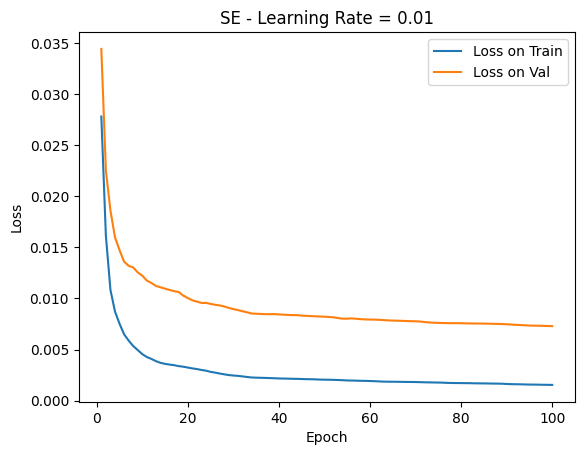

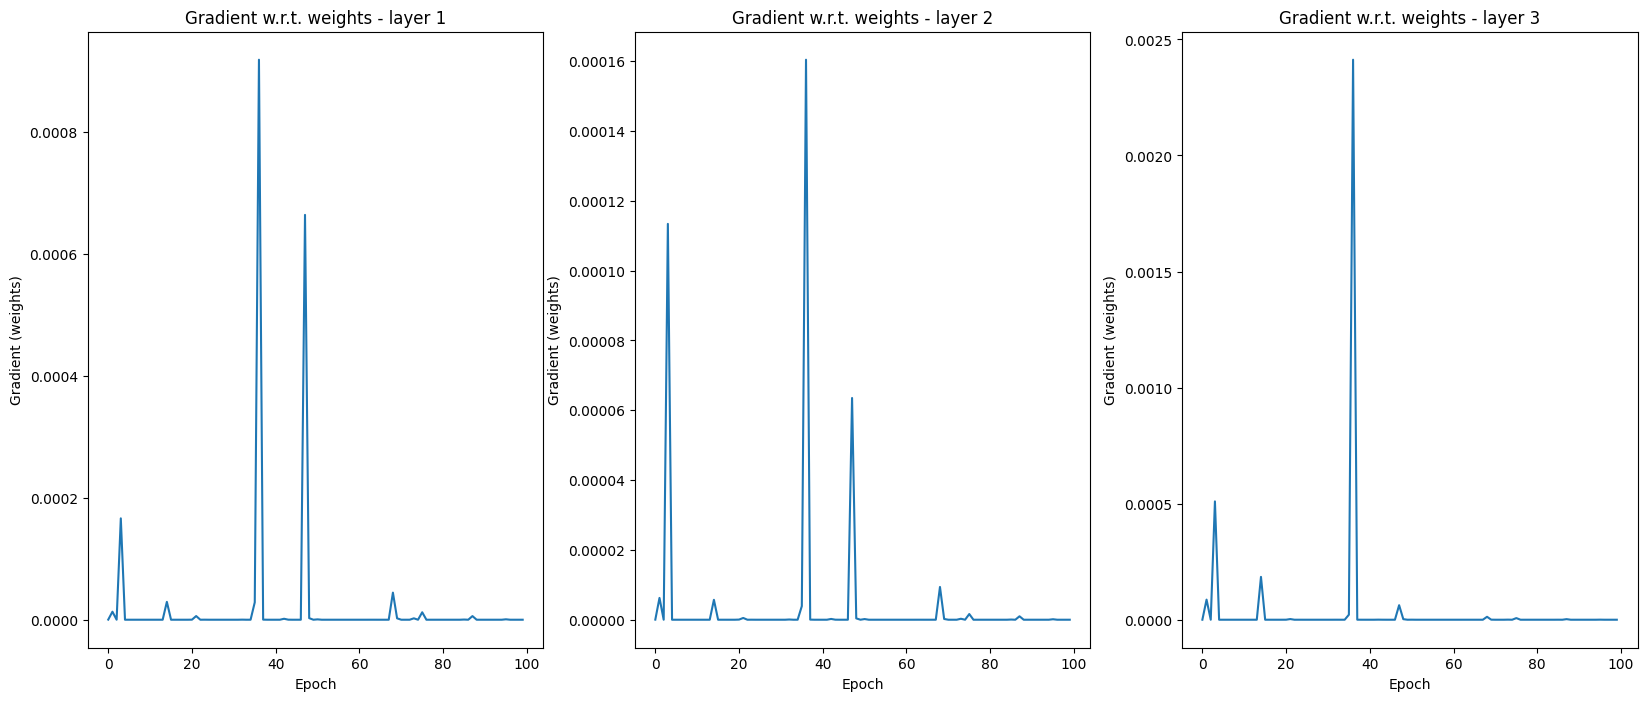

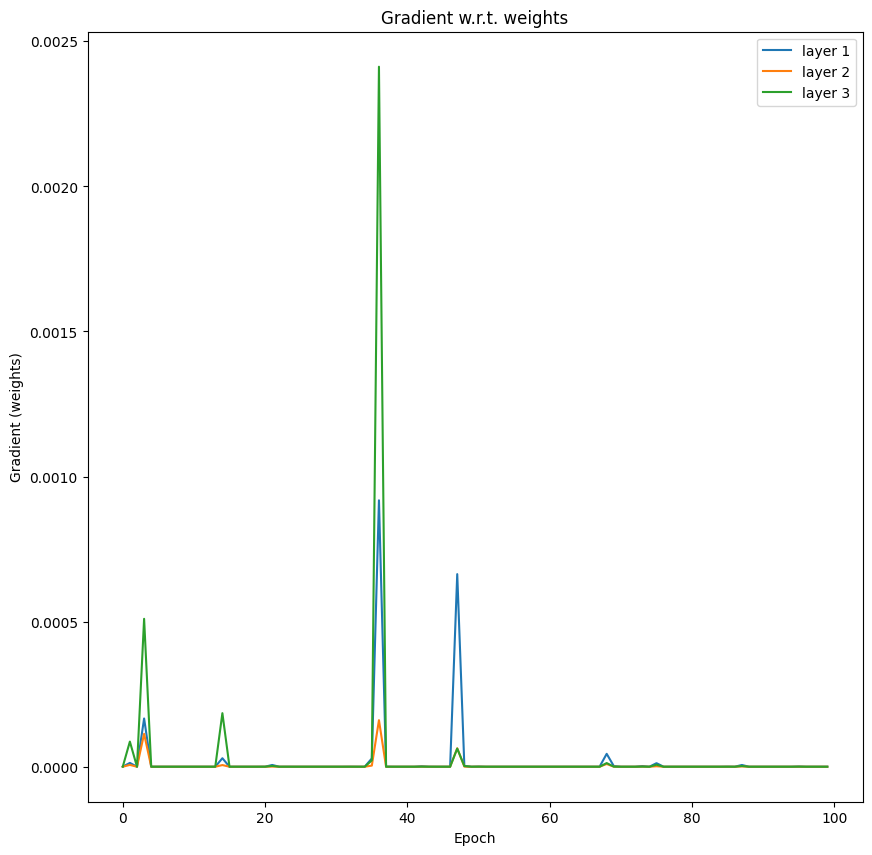

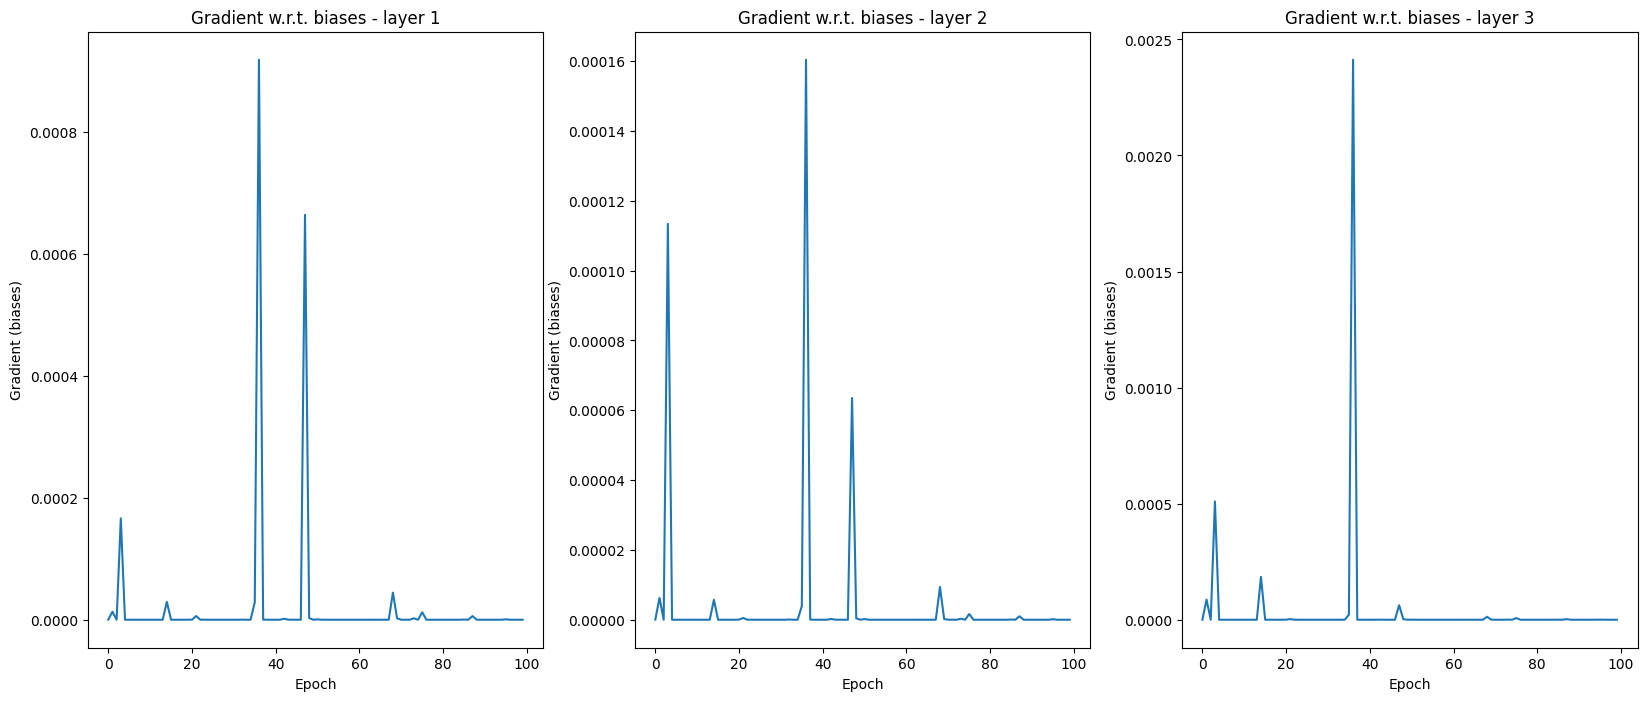

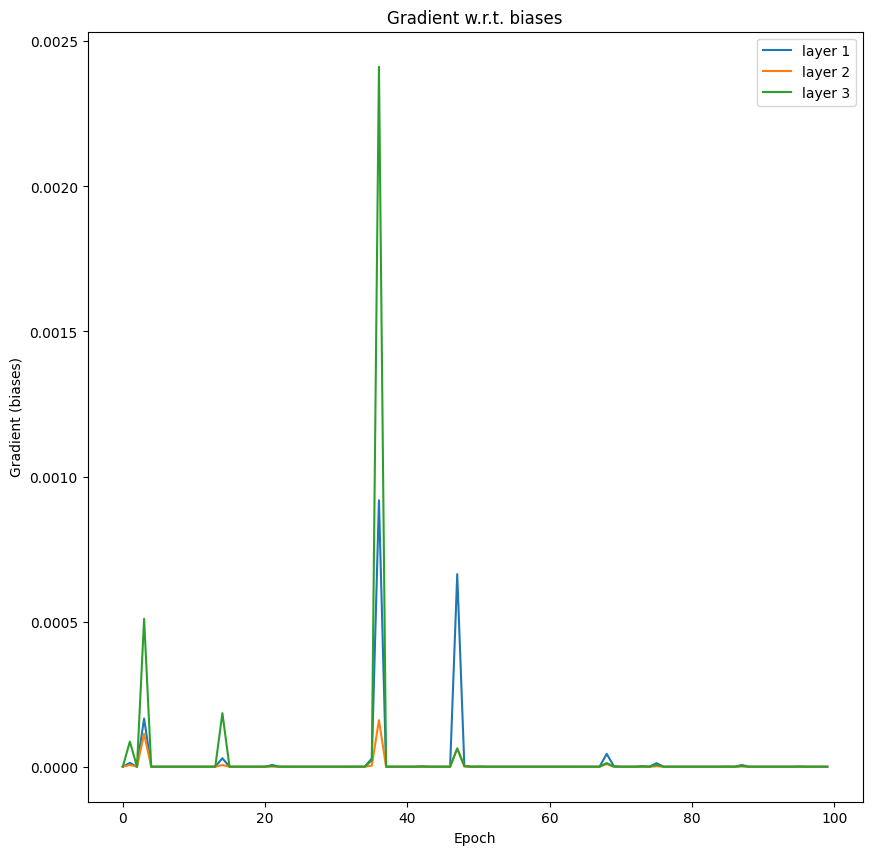

In [252]:
# Train the model
losses = nn_bin_SSIG.train(X_train_bin, Y_train_bin, batch_size=10, lr=1e-2, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin, verbose= True)

### COMMENTS:

- As we can see in the gradient vs. epoch graphs above, the weights and biases both have spikes, which may behave like `exploding gradients` but eventually die down to zero. This is also a `vanishing gradient` problem, but it is less of a problem than using sReLU. However, this cannot be categorized as a proper vanishing gradient because we see a smooth decrease in loss function.

Model accuracy = 98.82 %


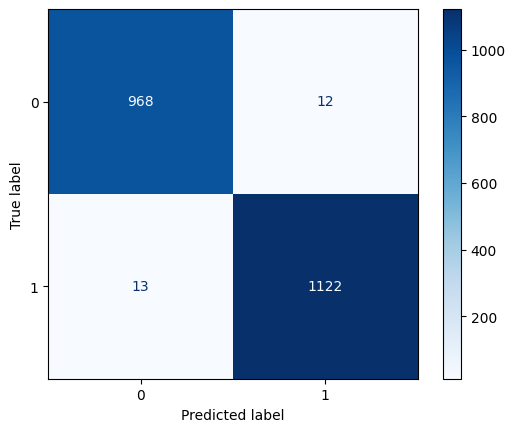

In [253]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Y_pred_bin = nn_bin_SSIG.predict(X_test_bin)

accuracy = np.mean(Y_pred_bin == Y_test_bin)
print("Model accuracy =", round(accuracy*100,2),"%")

matrix_bin = confusion_matrix(Y_test_bin, Y_pred_bin)
ConfusionMatrixDisplay(matrix_bin, display_labels=[0,1]).plot(cmap="Blues", values_format='')
plt.show()

### Part F
> Among the networks considered in questions 1d, 1e, describe which network was more prone to the vanishing gradient issue and which network was more prone to the exploding gradient issue. Use appropriate justifications for your observations involving the quantities used during backpropagation.


Among the networks considered in questions 1d and 1e:

1. **Vanishing Gradient Issue**: The network with SRELU activations (from part d) is likely more prone to the vanishing gradient problem. This is because even though SRELU is designed to address the problems of ReLU activation function, it can still suffer from vanishing gradients, especially in very deep networks. SSIG mitigates (part e) the problem even further, as it does not include a chain of direct multiplications of weights during backpropagation

2. **Exploding Gradient Issue**: The network with SSIG activations (from part e) is less prone to the exploding gradient problem due to the smoothness of the SSIG activation function and also due to the fact we are taking it's subgradient. It doesn't exhibit the abrupt changes that can lead to exploding gradients.

The actual behavior of these networks can be influenced by various factors including the specific architecture, the dataset, and the initialization scheme used during training.

### Part G
> Suppose you had a linear activation function at the output layer in the networks you considered in questions 1d, 1e. Compare and contrast the exploding gradient and vanishing gradient issues in the networks with linear activations at the output layer with that of networks with logistic sigmoid activation function at the output layer. Use appropriate justifications for your observations involving the quantities used during backpropagation. Using these observations, can you comment on the behavior if you had ReLU activation at the output layer (without actually running the experiments)?

#### sReLU + linear activation

In [254]:
# D_in is input dimension
# H1 is dimension of first hidden layer
# H2 is dimension of second hidden layer
# D_out is output dimension.

D_in, H1, H2, D_out = 784, 200, 100, 1
neurons = [D_in, H1, H2, D_out] # list of number of neurons in the layers sequentially.
activation_functions = ['sReLU','sReLU','linear'] # activations in each layer (Note: the input layer does not have any activation)
nn_bin_sReLU_Lin = Neural_Network(neurons, activation_functions) # Creating our neural network.

In [255]:
Y_train_bin.shape

(10132,)

Epoch 5..............Loss on train = 0.12453832425490269, Loss on val = 0.1244059348238502
Epoch 10..............Loss on train = 0.12452769045566675, Loss on val = 0.1243994601721097
Early Stopping .............. Returning best weights


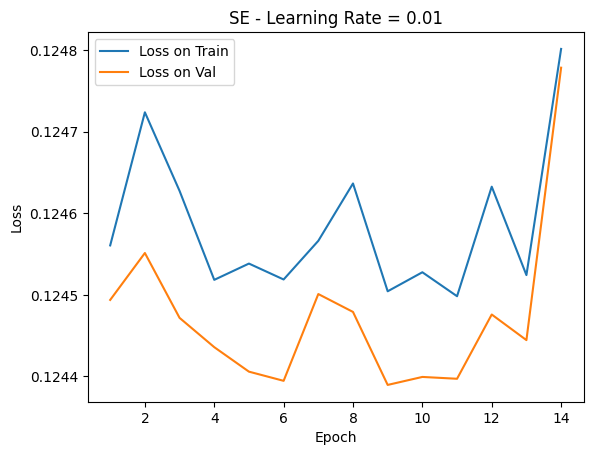

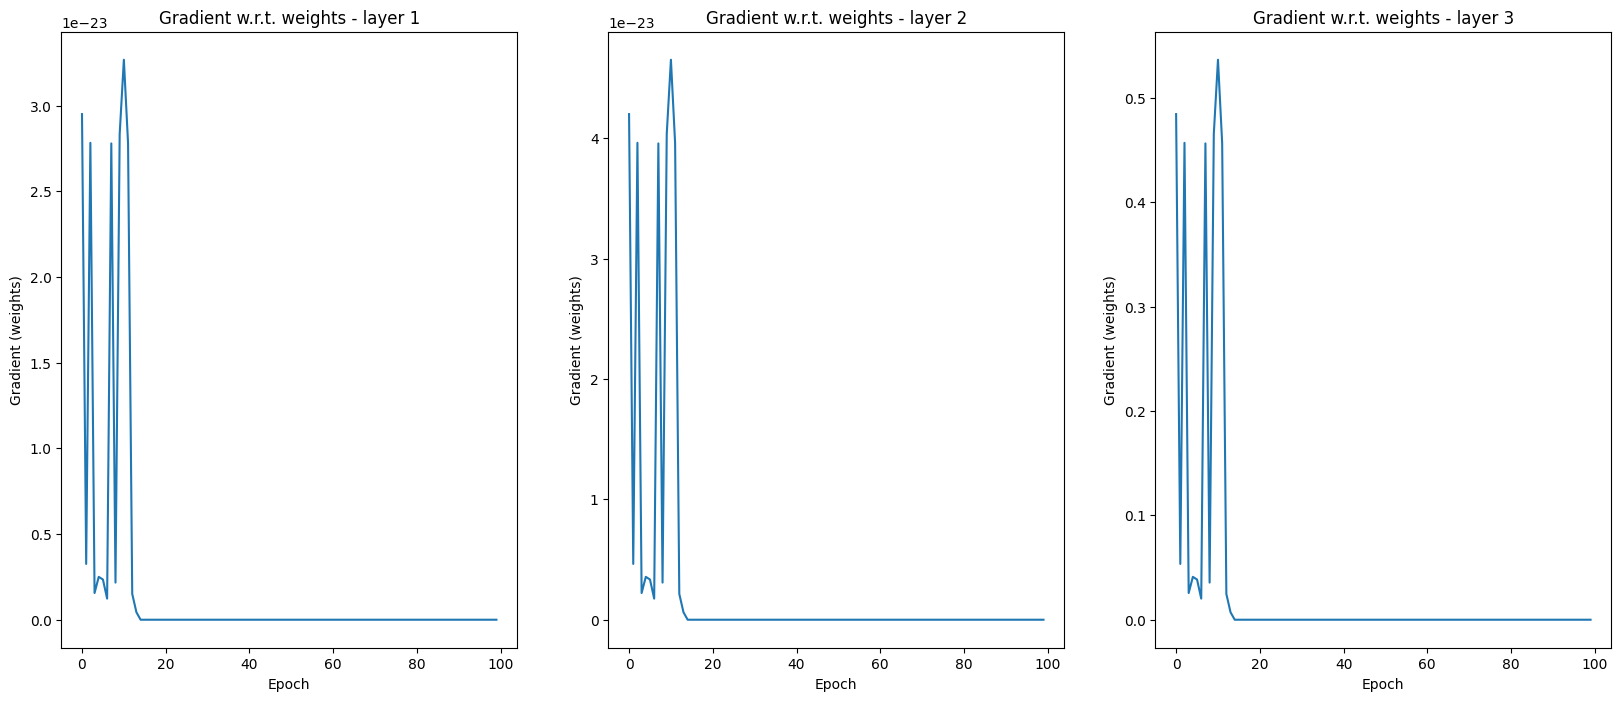

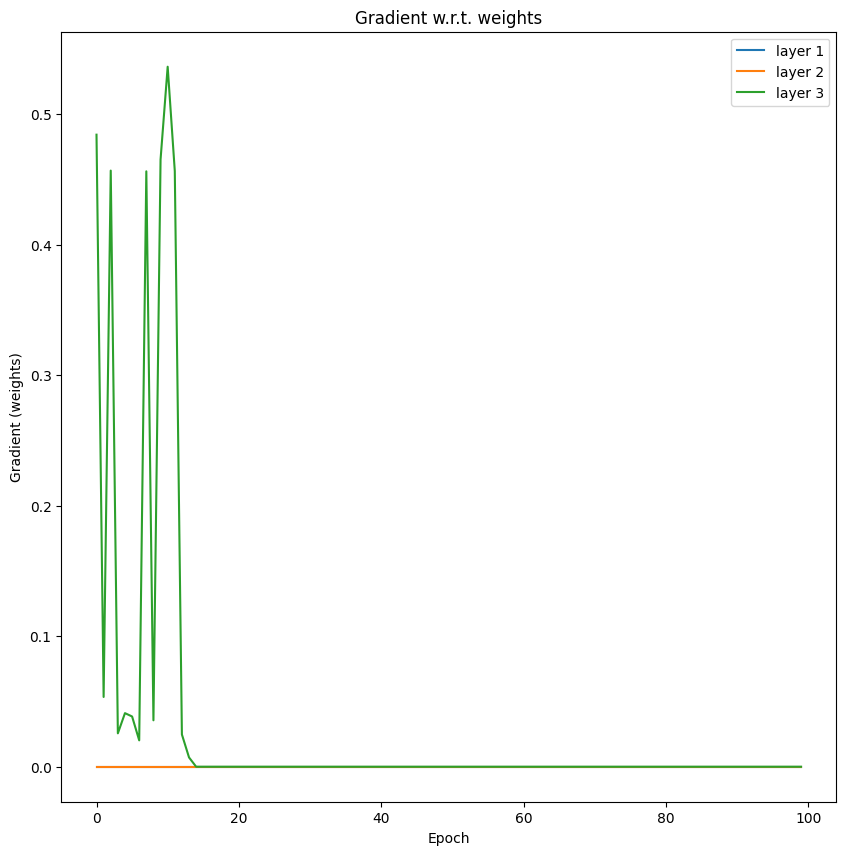

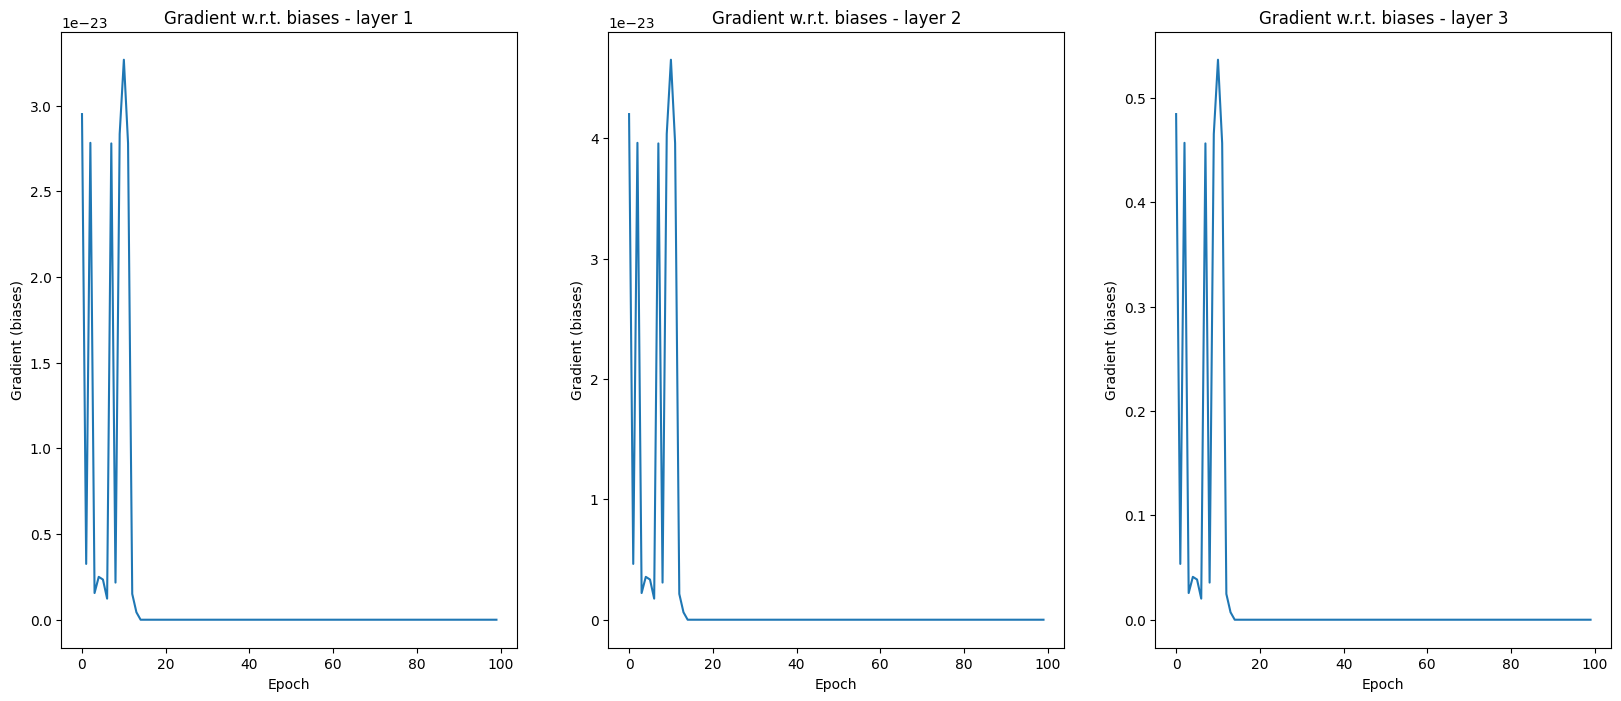

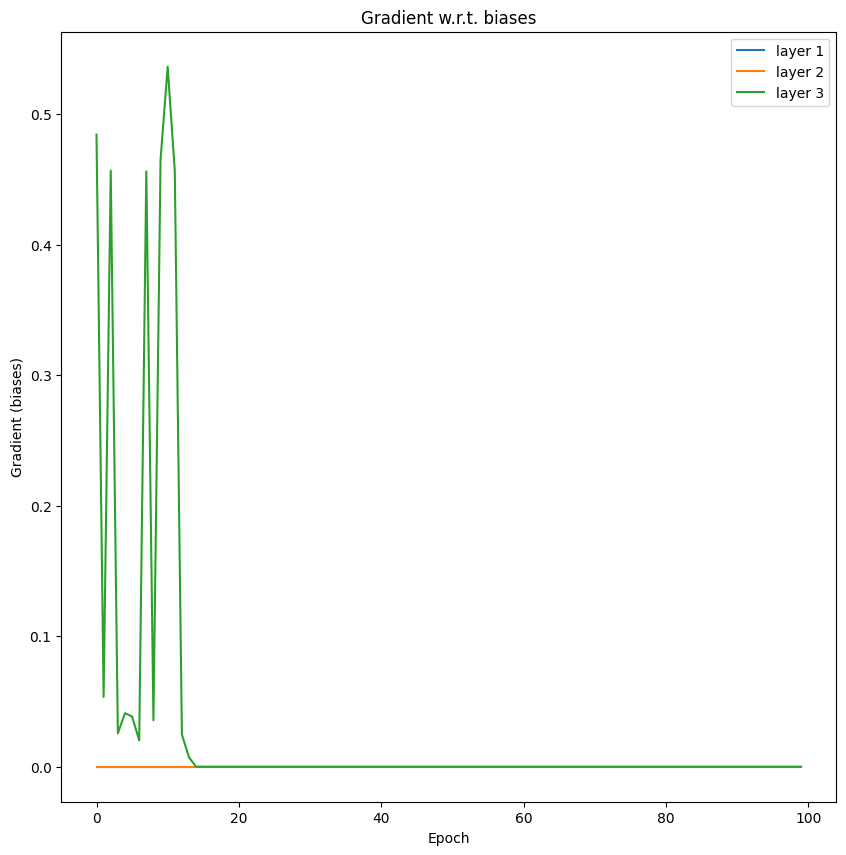

In [256]:
# Train the model
losses = nn_bin_sReLU_Lin.train(X_train_bin, Y_train_bin, batch_size=10, lr=1e-2, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin, verbose= True)

Model accuracy =

 53.66 %


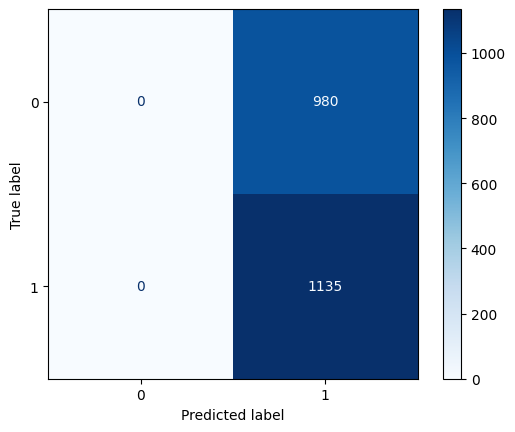

In [257]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Y_pred_bin = nn_bin_sReLU_Lin.predict(X_test_bin)

accuracy = np.mean(Y_pred_bin == Y_test_bin)
print("Model accuracy =", round(accuracy*100,2),"%")

matrix_bin = confusion_matrix(Y_test_bin, Y_pred_bin)
ConfusionMatrixDisplay(matrix_bin, display_labels=[0,1]).plot(cmap="Blues", values_format='')
plt.show()

#### SSIG + linear activation

In [258]:
# D_in is input dimension
# H1 is dimension of first hidden layer
# H2 is dimension of second hidden layer
# D_out is output dimension.

D_in, H1, H2, D_out = 784, 200, 100, 1
neurons = [D_in, H1, H2, D_out] # list of number of neurons in the layers sequentially.
activation_functions = ['SSIG','SSIG','linear'] # activations in each layer (Note: the input layer does not have any activation)
nn_bin_SSIG_Lin = Neural_Network(neurons, activation_functions) # Creating our neural network.

Epoch 5..............Loss on train = 0.01645230180650975, Loss on val = 0.03724392549157669
Epoch 10..............Loss on train = 0.008344397026780033, Loss on val = 0.02761991694901628
Epoch 15..............Loss on train = 0.006299834723066654, Loss on val = 0.0242468425528702
Epoch 20..............Loss on train = 0.006024061307662712, Loss on val = 0.0232398618956379
Epoch 25..............Loss on train = 0.004936646415633665, Loss on val = 0.020733150534540765
Epoch 30..............Loss on train = 0.005100338842567904, Loss on val = 0.019745515209057127
Epoch 35..............Loss on train = 0.003963732700917968, Loss on val = 0.01763628249290581
Epoch 40..............Loss on train = 0.003873908674653689, Loss on val = 0.01688343254869254
Epoch 45..............Loss on train = 0.0035972244968471468, Loss on val = 0.015969977965708225
Epoch 50..............Loss on train = 0.0033853003469708335, Loss on val = 0.015126622189263497
Epoch 55..............Loss on train = 0.003224243301005378

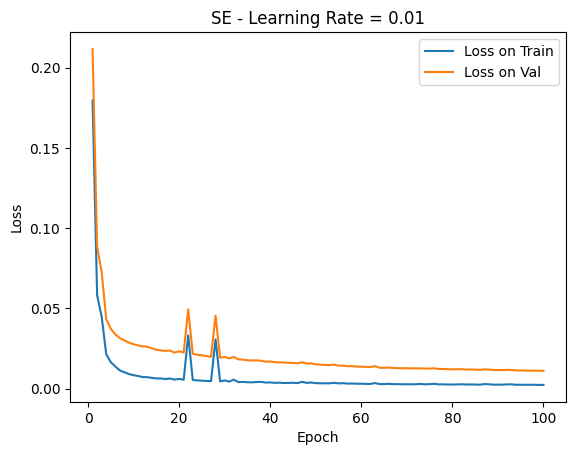

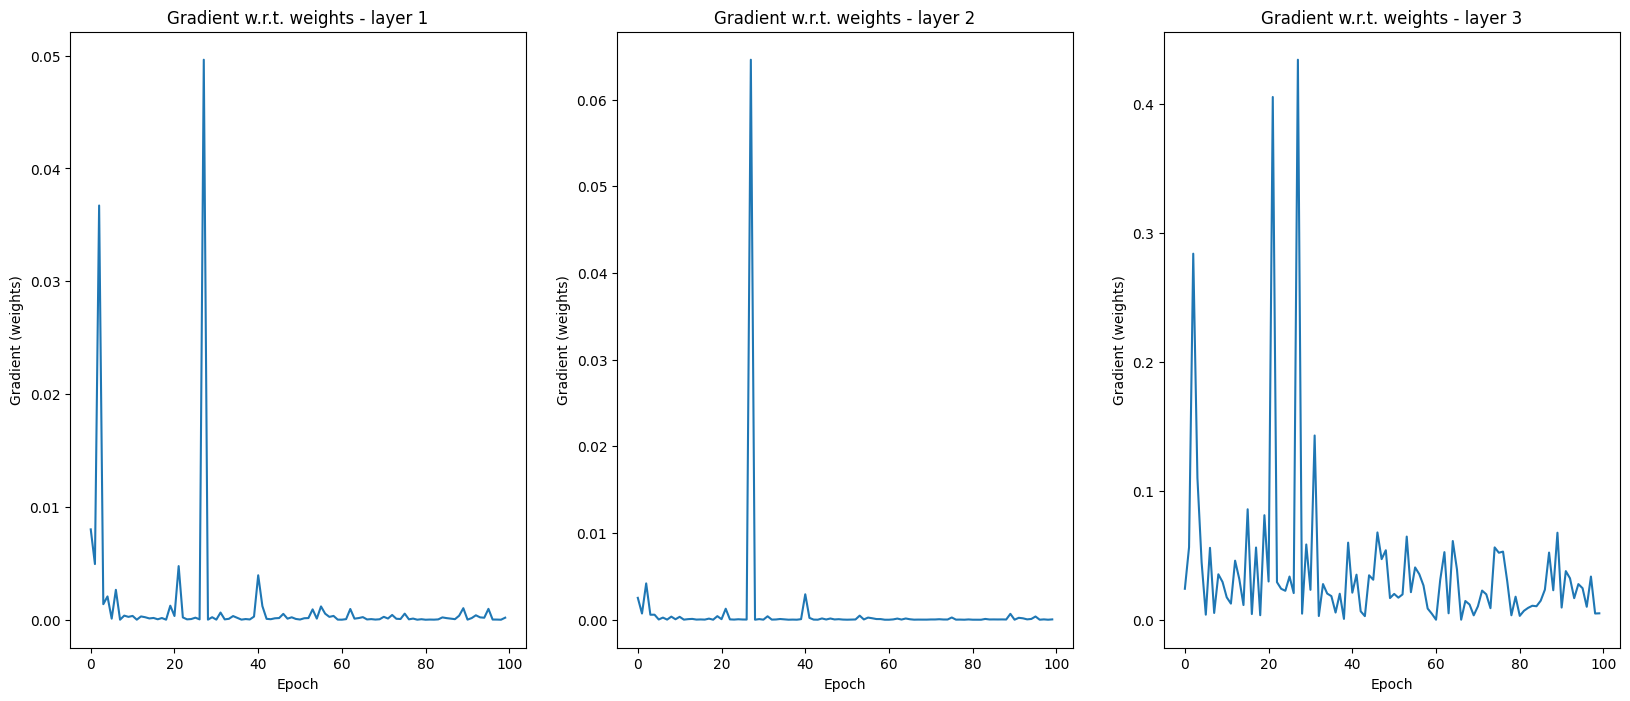

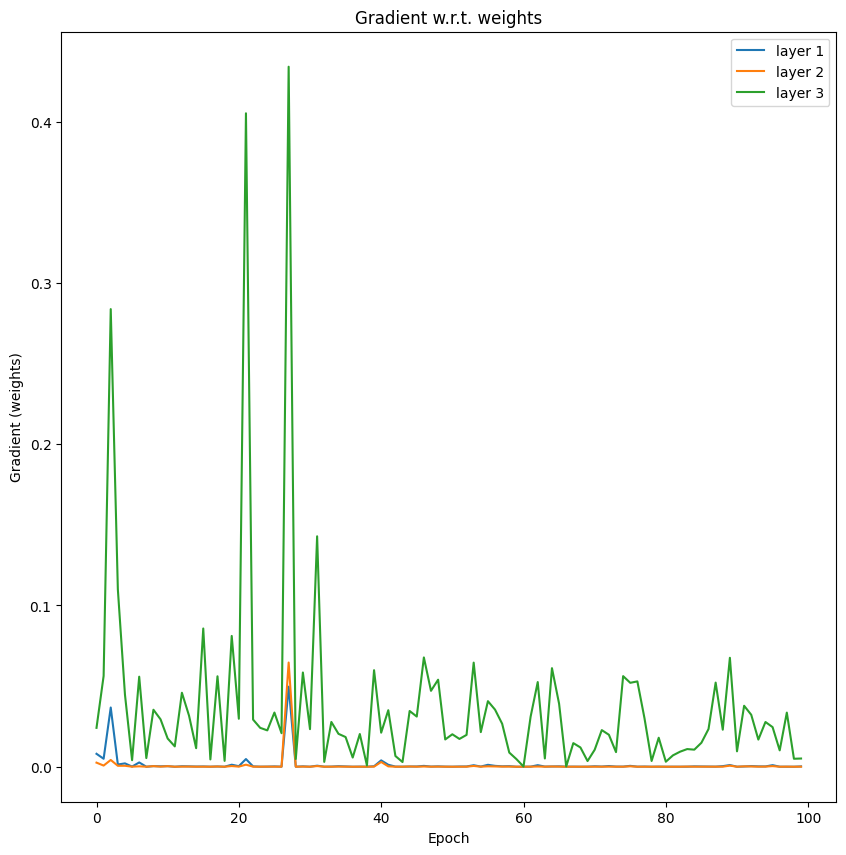

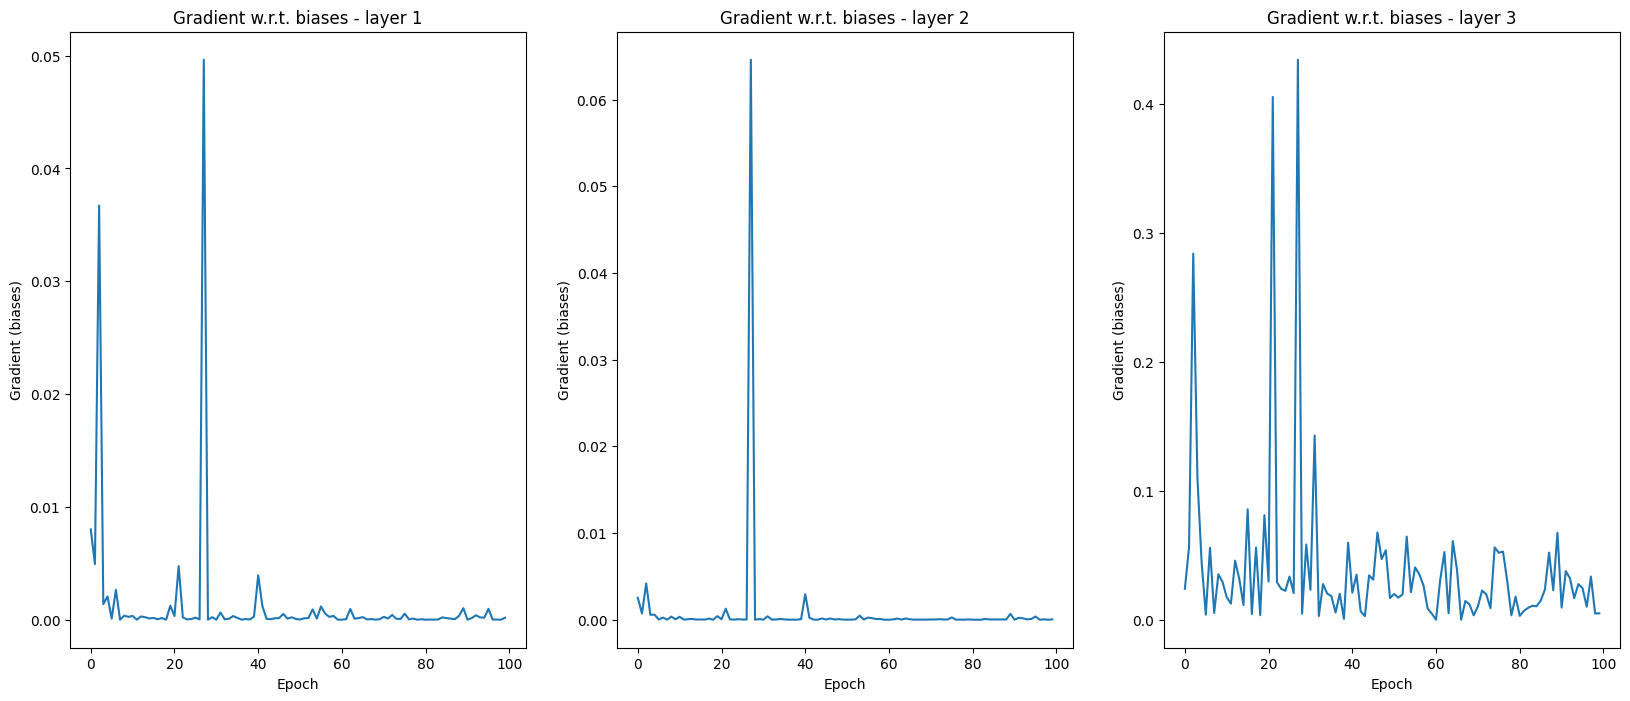

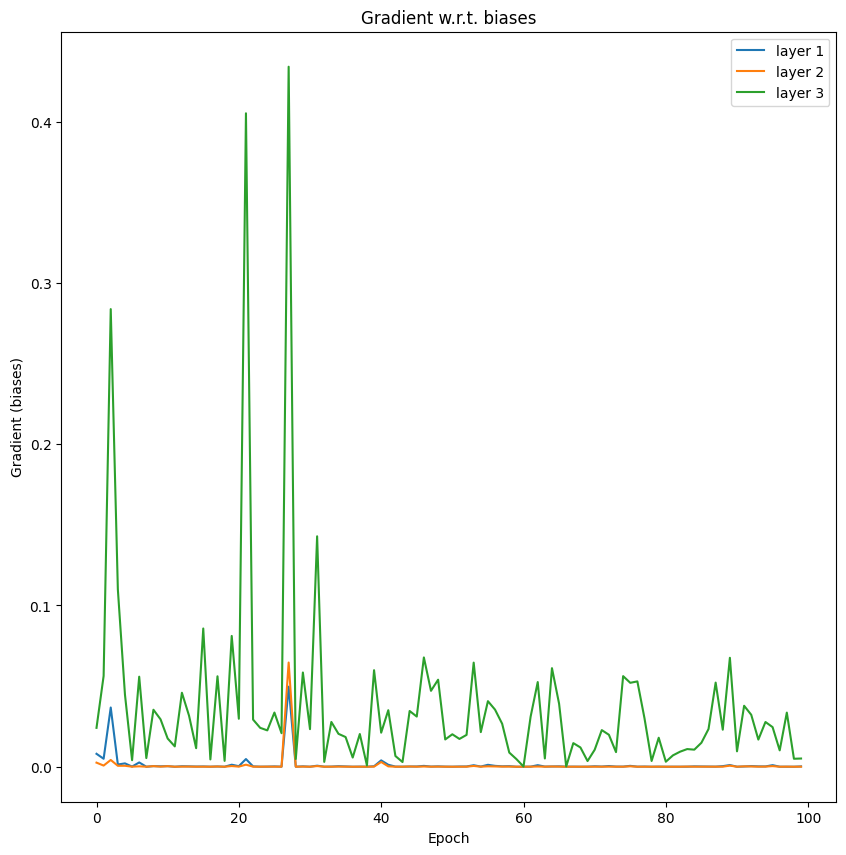

In [259]:
# Train the model
losses = nn_bin_SSIG_Lin.train(X_train_bin, Y_train_bin, batch_size=10, lr=1e-2, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin, verbose= True)

Model accuracy =

 99.39 %


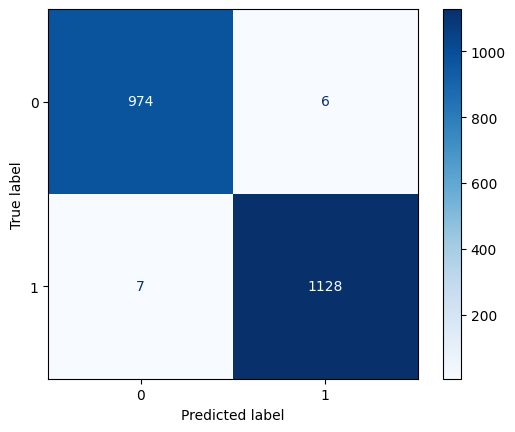

In [260]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Y_pred_bin = nn_bin_SSIG_Lin.predict(X_test_bin)

accuracy = np.mean(Y_pred_bin == Y_test_bin)
print("Model accuracy =", round(accuracy*100,2),"%")

matrix_bin = confusion_matrix(Y_test_bin, Y_pred_bin)
ConfusionMatrixDisplay(matrix_bin, display_labels=[0,1]).plot(cmap="Blues", values_format='')
plt.show()

### COMMENTS on Networks with Linear Activation at the Output Layer vs. Logistic Sigmoid Activation

1. **Exploding Gradient Issue**:

   - **Linear Activation**: With a linear activation function at the output layer, the gradients don't get squashed. This means that the gradients can grow unbounded. If there are layers with large weights or high activations, this can lead to an exploding gradient problem. This is particularly problematic in deep networks.
   
   - **Logistic Sigmoid Activation**: The logistic sigmoid function squashes the output between 0 and 1, which limits the magnitude of gradients. This helps mitigate the risk of exploding gradients.

2. **Vanishing Gradient Issue**:

   - **Linear Activation**: Linear activations don't contribute to the vanishing gradient problem. The gradients are directly proportional to the weights in the preceding layers.
   
   - **Logistic Sigmoid Activation**: The logistic sigmoid function, especially in the extremes (close to 0 or 1), has very flat regions where gradients become very small. This can lead to the vanishing gradient problem.

### COMMENTS on Potential Behavior with ReLU Activation at the Output Layer

If ReLU activation were used at the output layer:

1. **Exploding Gradient Issue**:

   - Similar to linear activation, ReLU doesn't squash the gradients as ReLU=max{0,z}. It allows for unbounded growth. If there are large weights or high activations in preceding layers, then this could lead to an exploding gradient problem.

2. **Vanishing Gradient Issue**:

   - ReLU activations is less prone to vanishing gradients as compared to sigmoid activations. They allow for non-zero gradients for positive inputs, which can help combat the vanishing gradient problem.

### CONCLUSION:

- **Linear Activation**: Prone to the exploding gradient problem but not the vanishing gradient problem.
  
- **Logistic Sigmoid Activation**: Less prone to exploding gradients but more prone to the vanishing gradient problem.

- **ReLU Activation** (if used at the output layer): Similar behavior to linear activation in terms of exploding gradients, but can be more robust against the vanishing gradient problem compared to sigmoid activation.